In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import re
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2


pd.options.display.max_rows = 100
pd.options.mode.copy_on_write = True

In [55]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
df = df.sample(10000)
df.describe()


no_nutriments  additives_n  ingredients_from_palm_oil_n  \
count            0.0  7747.000000                  7747.000000   
mean             NaN     1.920098                     0.018846   
std              NaN     2.471306                     0.141571   
min              NaN     0.000000                     0.000000   
25%              NaN     0.000000                     0.000000   
50%              NaN     1.000000                     0.000000   
75%              NaN     3.000000                     0.000000   
max              NaN    31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                              7747.000000   
mean                         NaN                                 0.054085   
std                          NaN                                 0.272298   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 4.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  energy_100g  \
count                                    0.0                 0.0  8155.000000   
mean                                     NaN                 NaN  1129.268058   
std                                      NaN                 NaN   803.909225   
min                                      NaN                 NaN     0.000000   
25%                                      NaN                 NaN   381.000000   
50%                                      NaN                 NaN  1109.000000   
75%                                      NaN                 NaN  1674.000000   
max                                      NaN                 NaN  6975.000000   

       energy-from-fat_100g     fat_100g  ...  ph_100g  \
count             25.000000  7566.000000  ...     1.00   
mean             462.872000    12.649833  ...     5.85   
std              502.703302    17.387440  ...      NaN   
min                0.000000     0.000000  ...     5.85   
25%              103.000000     0.000000  ...     5.85   
50%              146.000000     4.705000  ...     5.85   
75%             1050.000000    20.590000  ...     5.85   
max             1330.000000   105.000000  ...     5.85   

       fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
count                   103.000000                           5.00000   
mean                     26.687379                          14.40000   
std                      28.441714                           2.50998   
min                       0.000000                          12.00000   
25%                       0.000000                          12.00000   
50%                      15.000000                          15.00000   
75%                      50.000000                          15.00000   
max                     100.000000                          18.00000   

       cocoa_100g  chlorophyl_100g  carbon-footprint_100g  \
count   24.000000              0.0              10.000000   
mean    52.666667              NaN             247.700000   
std     19.901205              NaN             313.644441   
min     26.000000              NaN               0.000000   
25%     32.000000              NaN              73.775000   
50%     52.000000              NaN             139.000000   
75%     67.000000              NaN             197.925000   
max     95.000000              NaN             828.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g  glycemic-index_100g  \
count              6918.000000              6918.000000                  0.0   
mean                  9.274212                 9.153079                  NaN   
std                   9.12

In [56]:

df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [57]:
df.drop(columns=['url', 'creator', 'created_t', 'created_datetime','last_modified_t', 'last_modified_datetime','countries','countries_tags','countries_fr','image_url','image_small_url','states','states_tags','states_fr'],inplace=True)
cols_to_drop = df.filter(regex='_n$').columns
df.drop(columns=cols_to_drop, inplace=True)
cols_to_drop = df.filter(regex='^state').columns

df.drop(columns=cols_to_drop, inplace=True)

<Axes: >

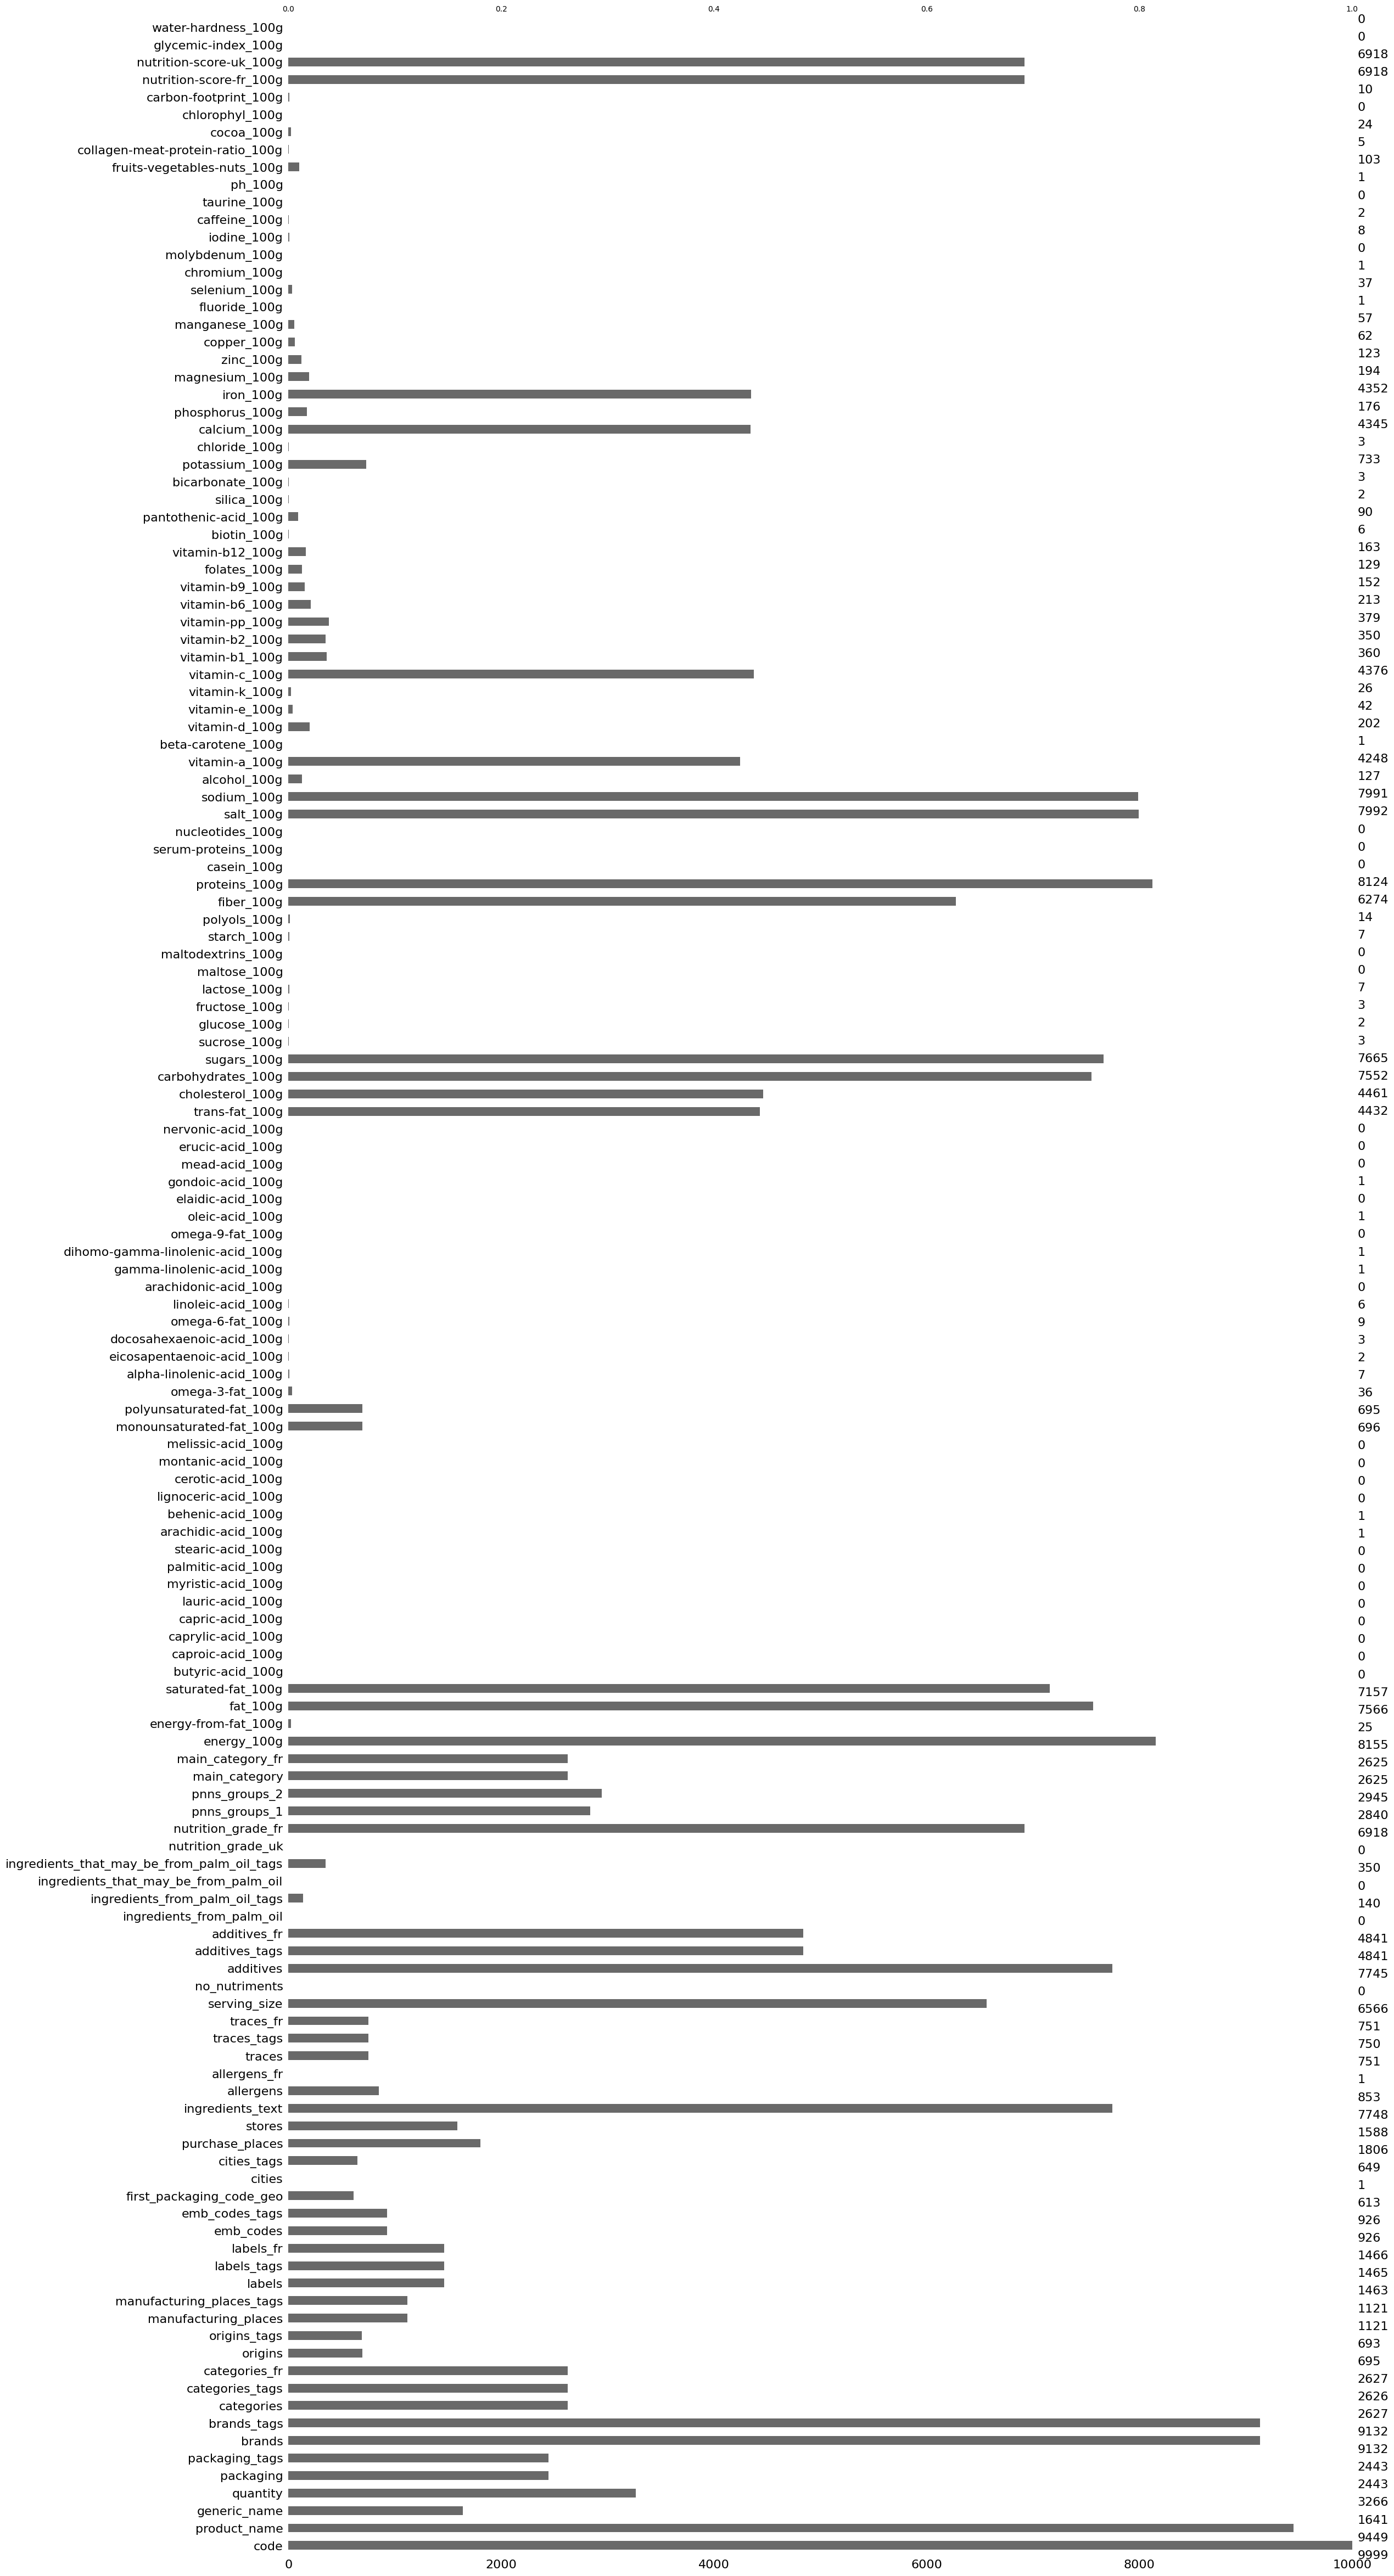

In [58]:
msno.bar(df)

In [59]:

# Calculer le nombre total de lignes
total_rows = len(df)

# Calculer le nombre de valeurs non nulles dans chaque colonne
non_null_counts = df.notna().sum()

# Calculer le taux de remplissage de chaque colonne
filling_rates = non_null_counts / total_rows * 100
filling_rates

# Filtrer les colonnes avec un taux de remplissage entre 20% et 50%
selected_columns = filling_rates[(filling_rates >= 5) ].index
selected_columns
# Conserver uniquement les colonnes sélectionnées
df_cleaned = df[selected_columns]
len(df_cleaned)

10000

<Axes: >

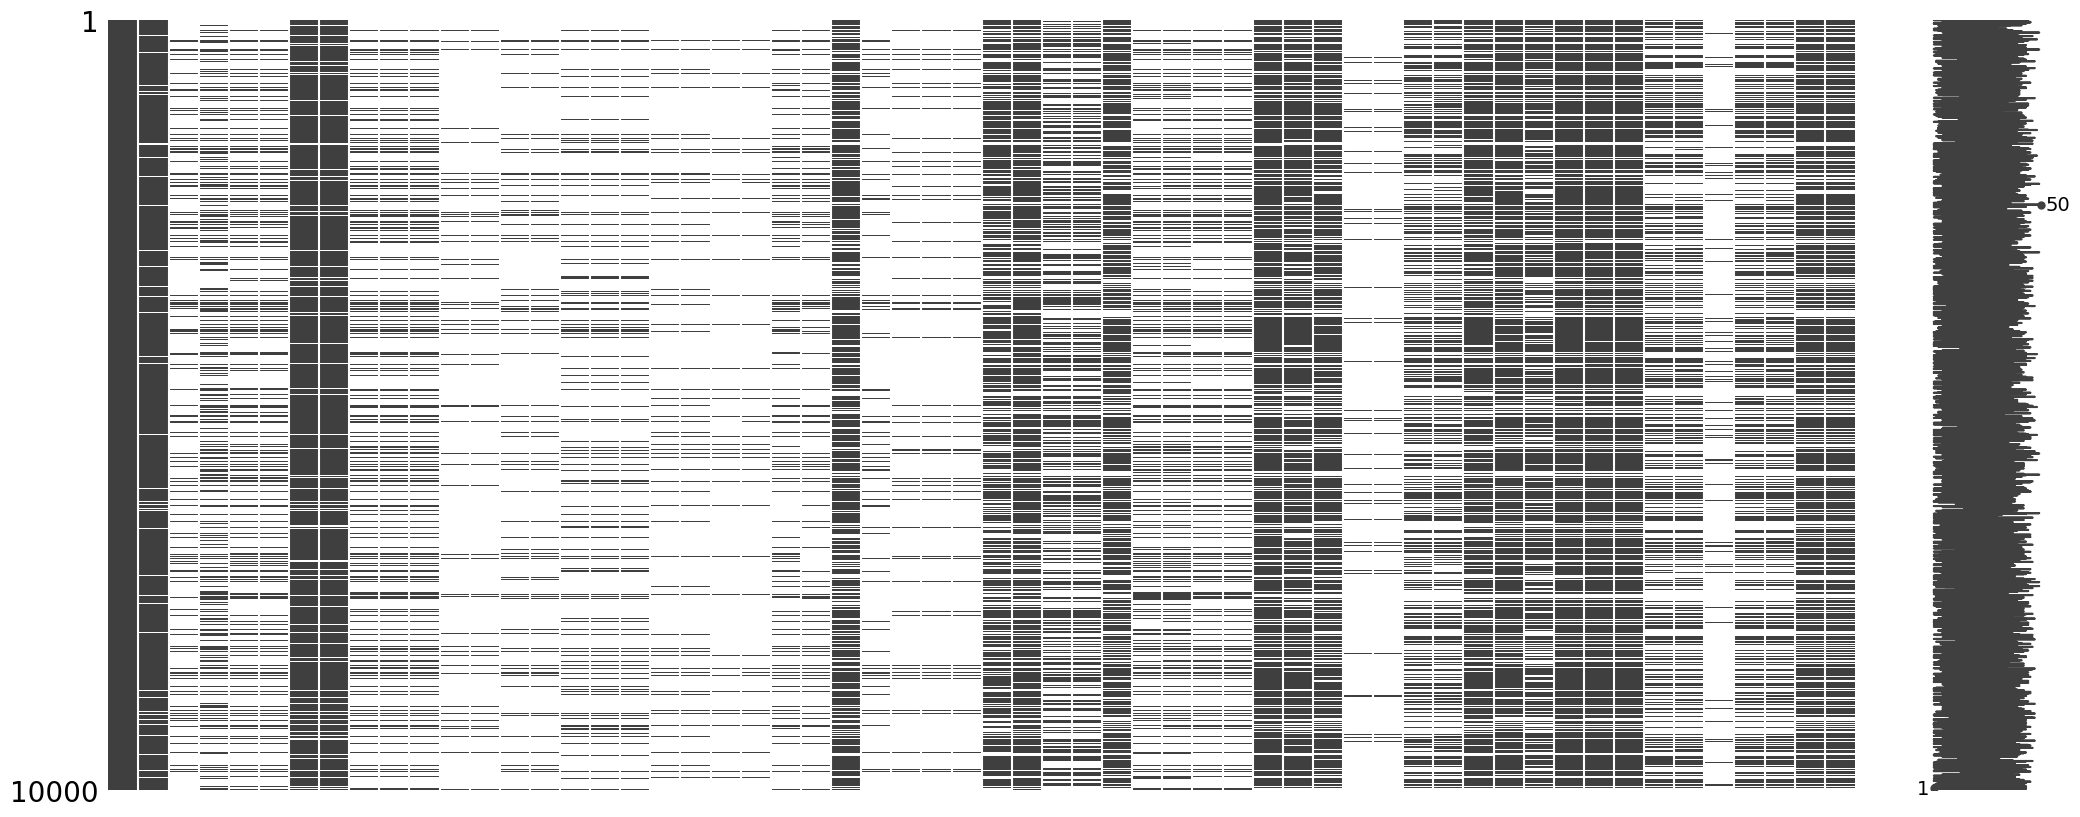

In [60]:
msno.matrix(df_cleaned)

In [61]:
df_cible=df_cleaned.dropna(subset=['pnns_groups_1'])
df_pnns1 = df_cible['pnns_groups_1']

In [62]:
counts = df_pnns1.value_counts().reset_index()
counts.columns = ['pnns_groups_1', 'Counts']
print(df_pnns1.value_counts())
# Créer le graphique avec Plotly
fig = px.bar(counts, x='pnns_groups_1', y='Counts', title='Value Counts de la variable pnns_groups_1')

# Afficher le graphique
fig.show()

pnns_groups_1
unknown                    741
Sugary snacks              373
Beverages                  278
Milk and dairy products    266
Fish Meat Eggs             241
Cereals and potatoes       239
Composite foods            213
Fruits and vegetables      180
Fat and sauces             178
Salty snacks                93
fruits-and-vegetables       28
sugary-snacks               10
Name: count, dtype: int64


In [63]:
df_cleaned['pnns_groups_1']=df_cleaned.pnns_groups_1.replace({"-":" "},regex=True)
df_cleaned['pnns_groups_1']=df_cleaned['pnns_groups_1'].str.lower()
df_cleaned['pnns_groups_1'].value_counts()

pnns_groups_1
unknown                    741
sugary snacks              383
beverages                  278
milk and dairy products    266
fish meat eggs             241
cereals and potatoes       239
composite foods            213
fruits and vegetables      208
fat and sauces             178
salty snacks                93
Name: count, dtype: int64

In [64]:

df_cleaned['pnns_groups_1']=df_cleaned.pnns_groups_1.replace({"unknown":np.nan},regex=True)
df_cleaned['pnns_groups_1'].value_counts()

pnns_groups_1
sugary snacks              383
beverages                  278
milk and dairy products    266
fish meat eggs             241
cereals and potatoes       239
composite foods            213
fruits and vegetables      208
fat and sauces             178
salty snacks                93
Name: count, dtype: int64

<Axes: >

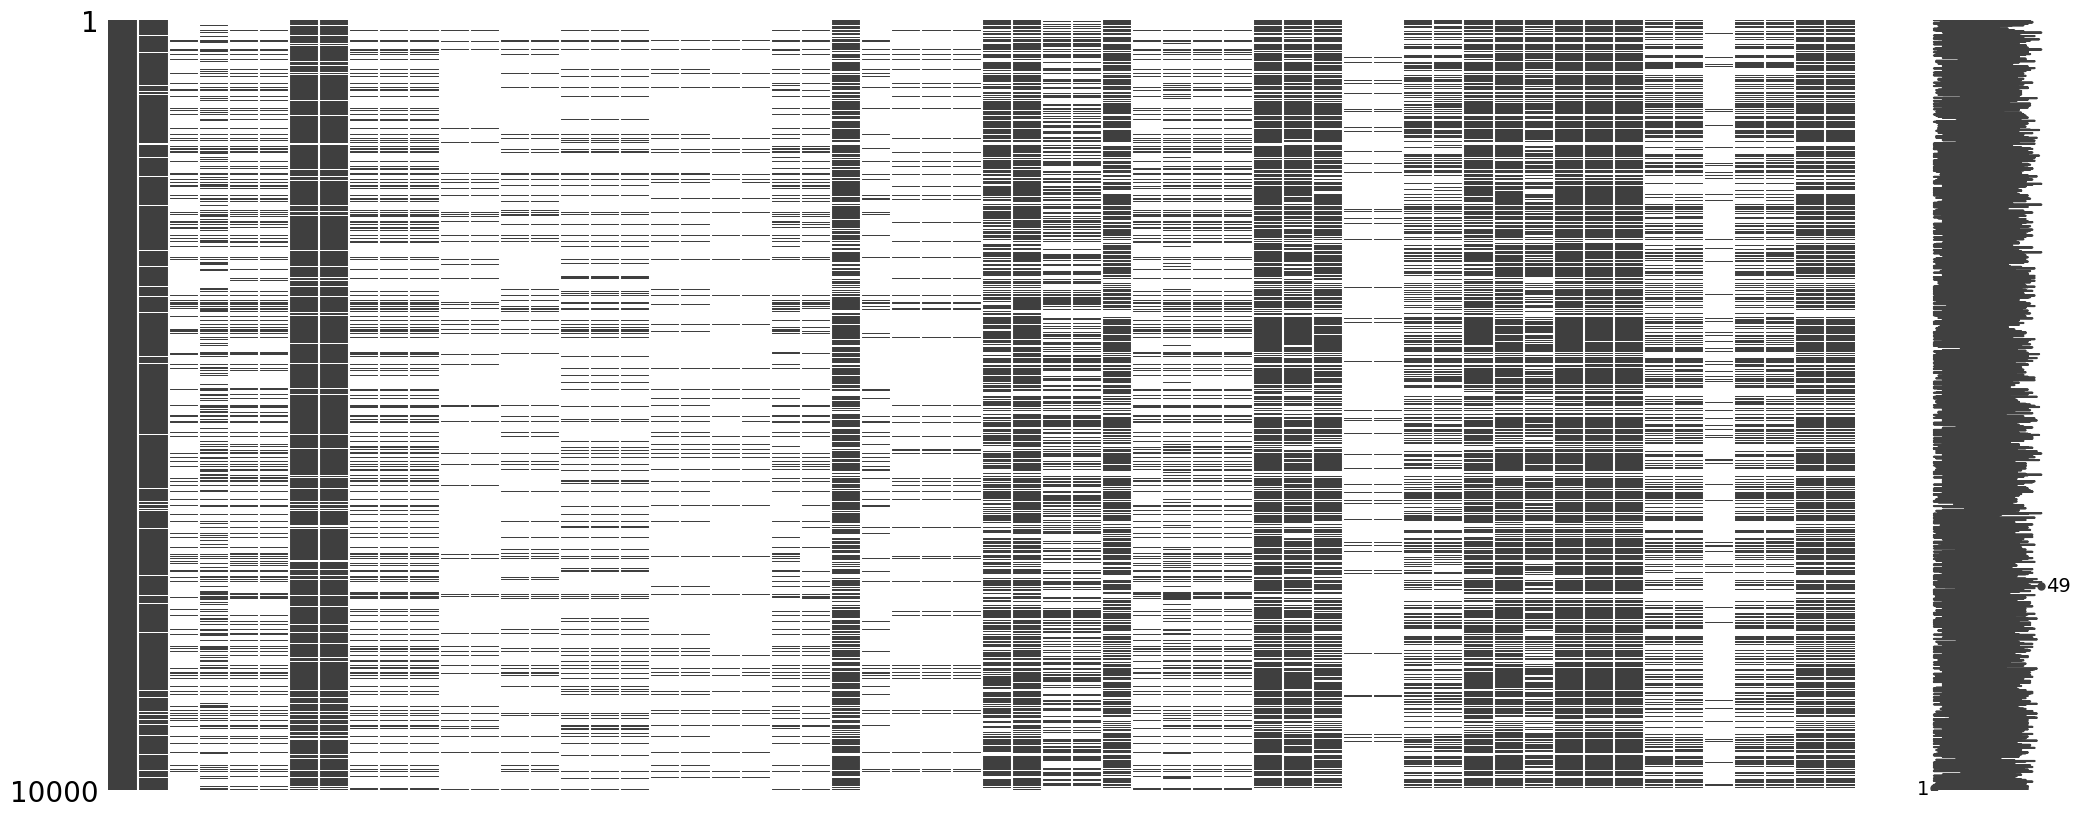

In [65]:
msno.matrix(df_cleaned)

In [66]:
df_cible=df_cleaned.dropna(subset=['pnns_groups_1'])

In [67]:
# Compter le nombre de valeurs non nulles dans la colonne 'ingredients_text'
nombre_de_valeurs_non_nulles = df_cleaned['ingredients_text'].count()

# Calculer le nombre total de lignes dans le DataFrame
nombre_total_de_lignes = len(df_cleaned)

# Calculer le taux de remplissage de la colonne 'ingredients_text'
taux_de_remplissage = (nombre_de_valeurs_non_nulles / nombre_total_de_lignes) * 100
taux_de_remplissage

77.48

In [68]:
df_pnns1 = df_cleaned['pnns_groups_1']

In [69]:
percentages_before = df_cleaned['pnns_groups_1'].value_counts(normalize=True) * 100

In [70]:
df_pnns1 = df_cleaned['pnns_groups_1']
counts = df_pnns1.value_counts()
percentages = counts / len(df_cleaned)*100
print(percentages)

percentages_df = percentages.reset_index()
percentages_df.columns = ['Valeur', 'Pourcentage']
print(percentages_df)

pnns_groups_1
sugary snacks              3.83
beverages                  2.78
milk and dairy products    2.66
fish meat eggs             2.41
cereals and potatoes       2.39
composite foods            2.13
fruits and vegetables      2.08
fat and sauces             1.78
salty snacks               0.93
Name: count, dtype: float64
                    Valeur  Pourcentage
0            sugary snacks         3.83
1                beverages         2.78
2  milk and dairy products         2.66
3           fish meat eggs         2.41
4     cereals and potatoes         2.39
5          composite foods         2.13
6    fruits and vegetables         2.08
7           fat and sauces         1.78
8             salty snacks         0.93


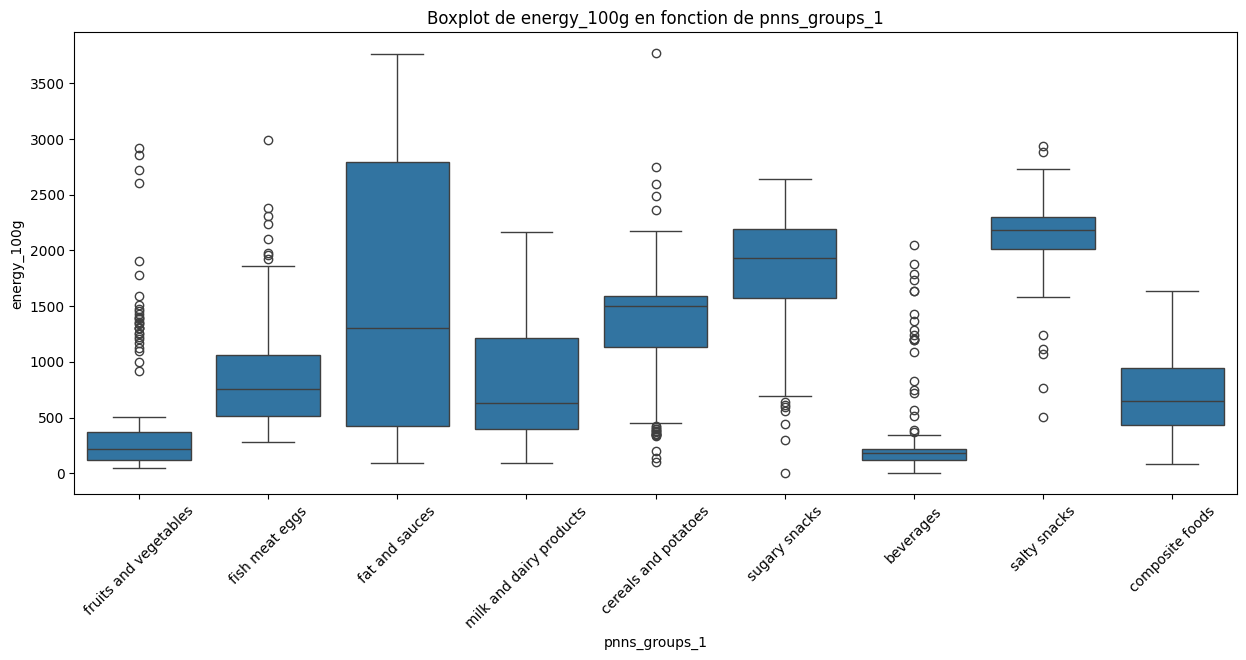

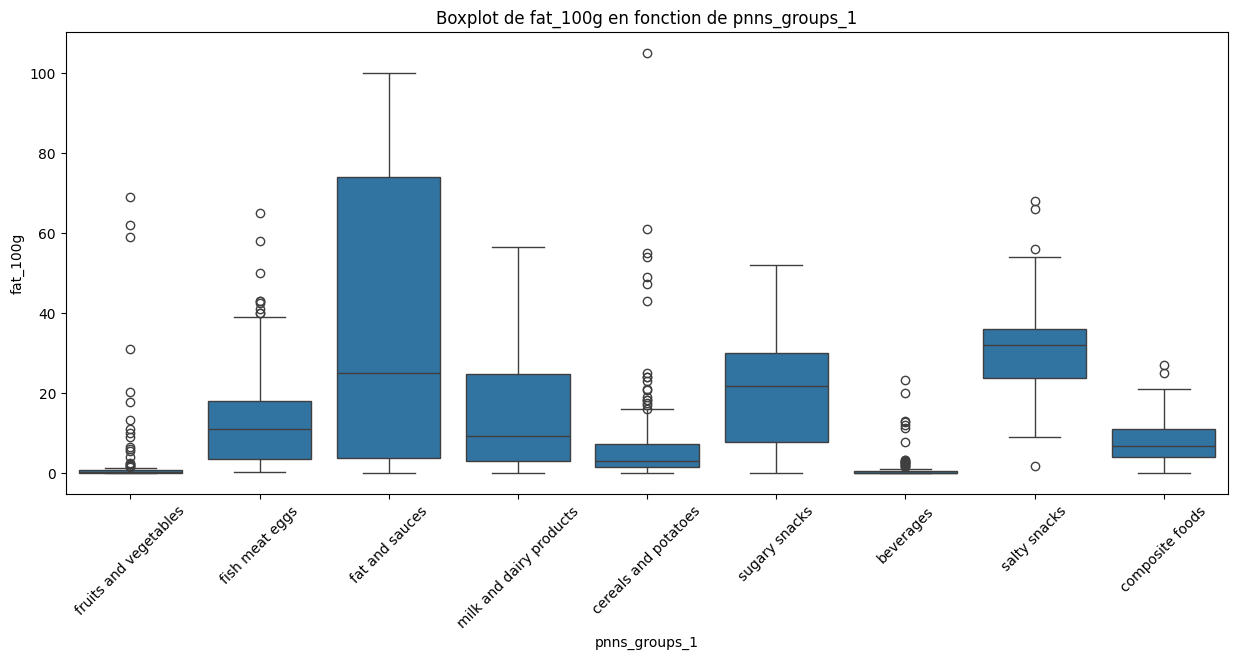

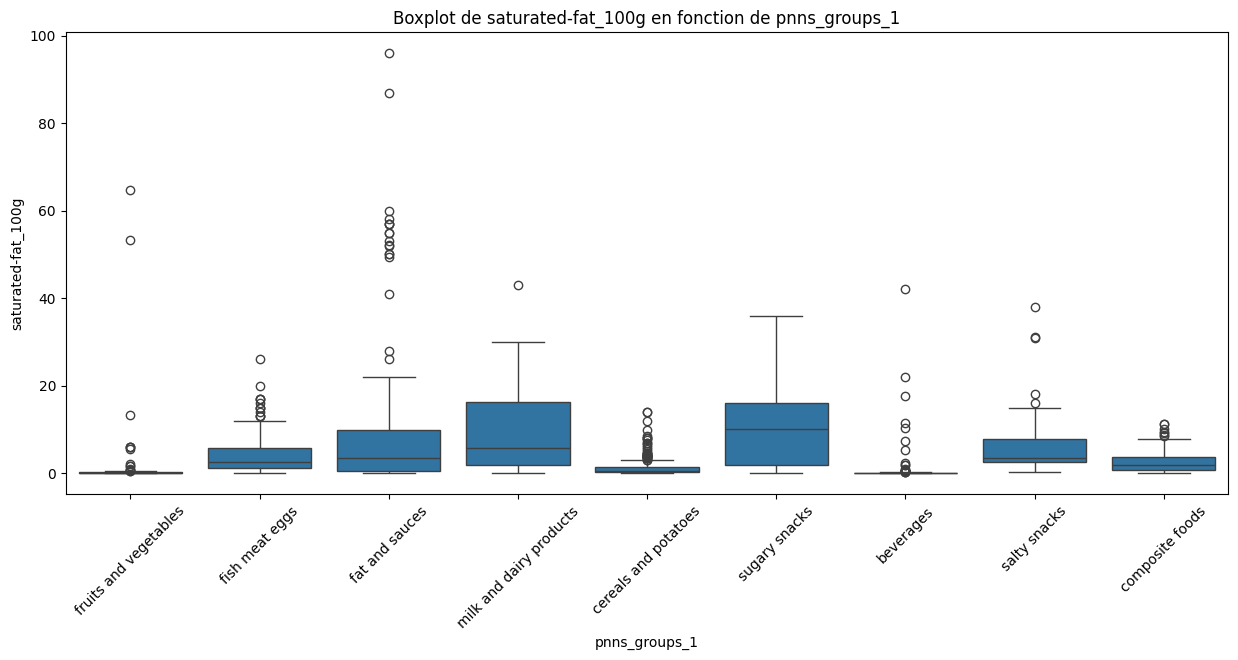

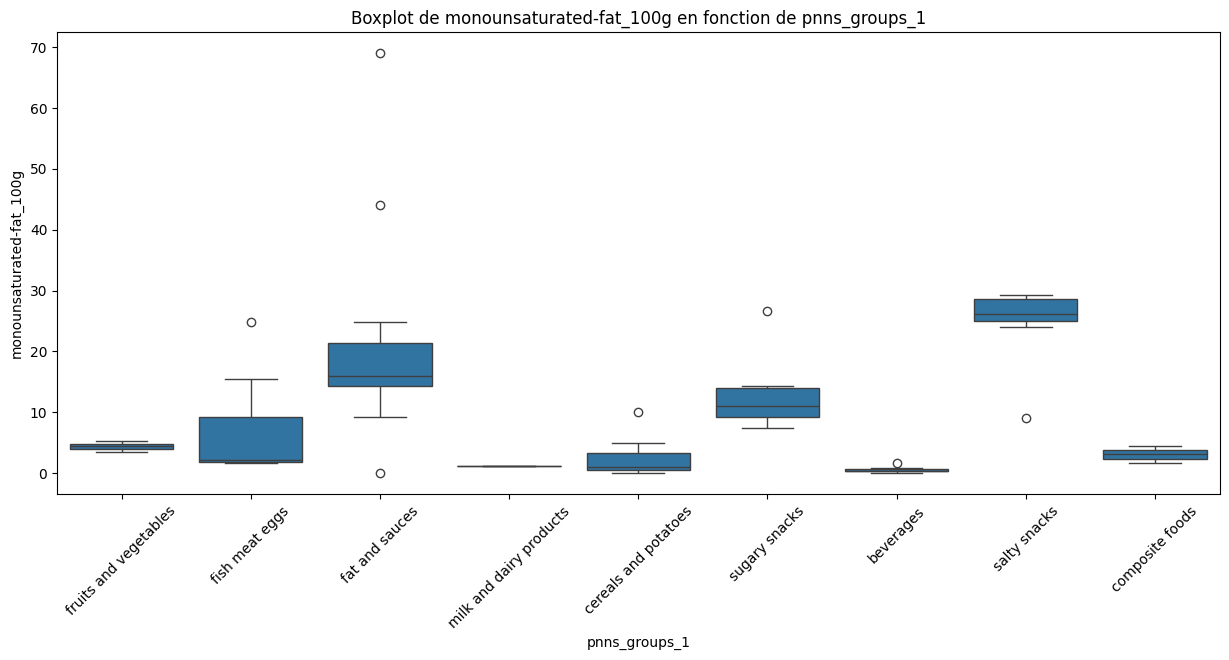

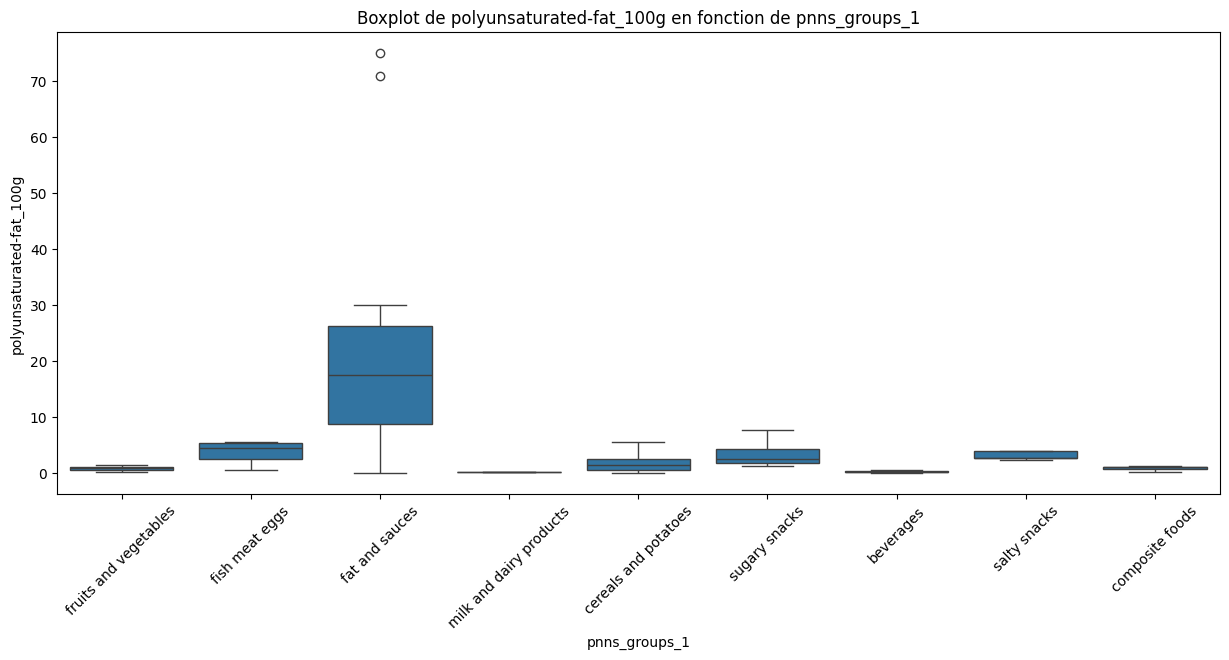

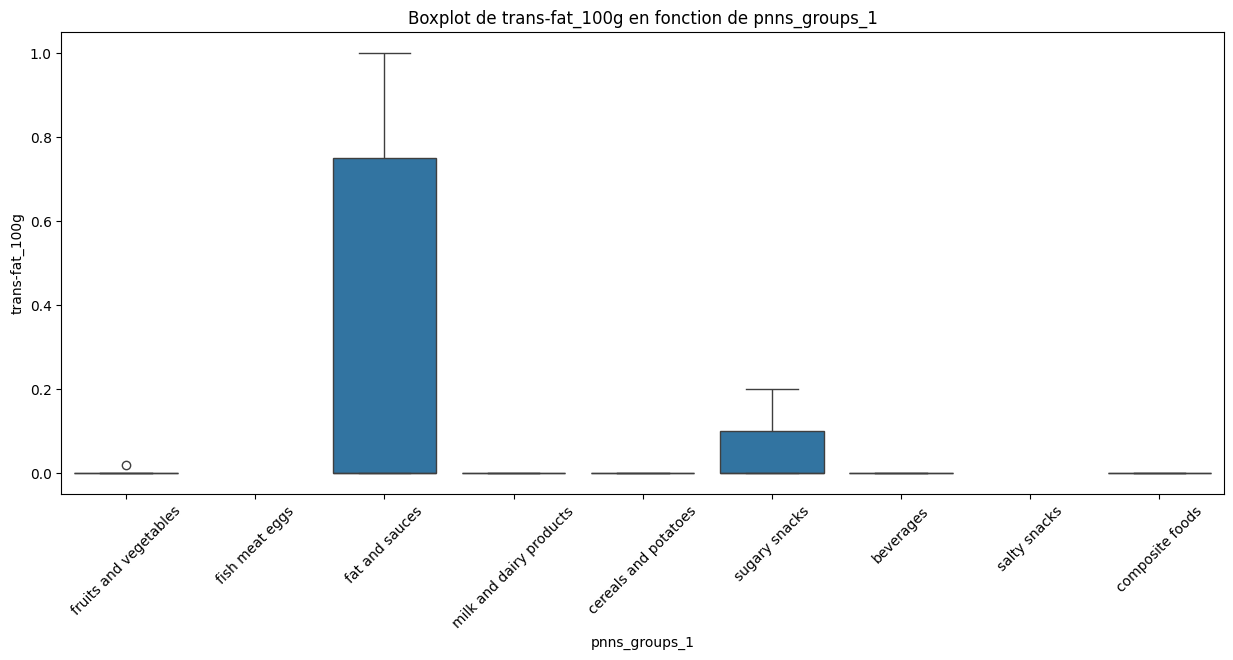

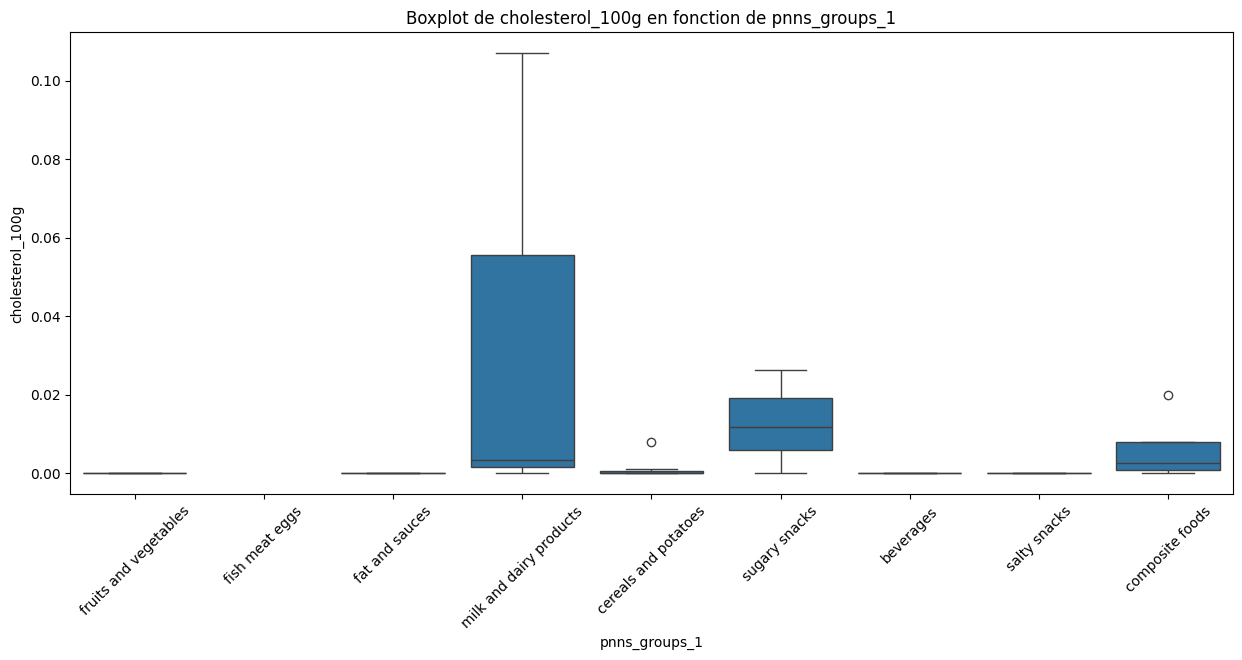

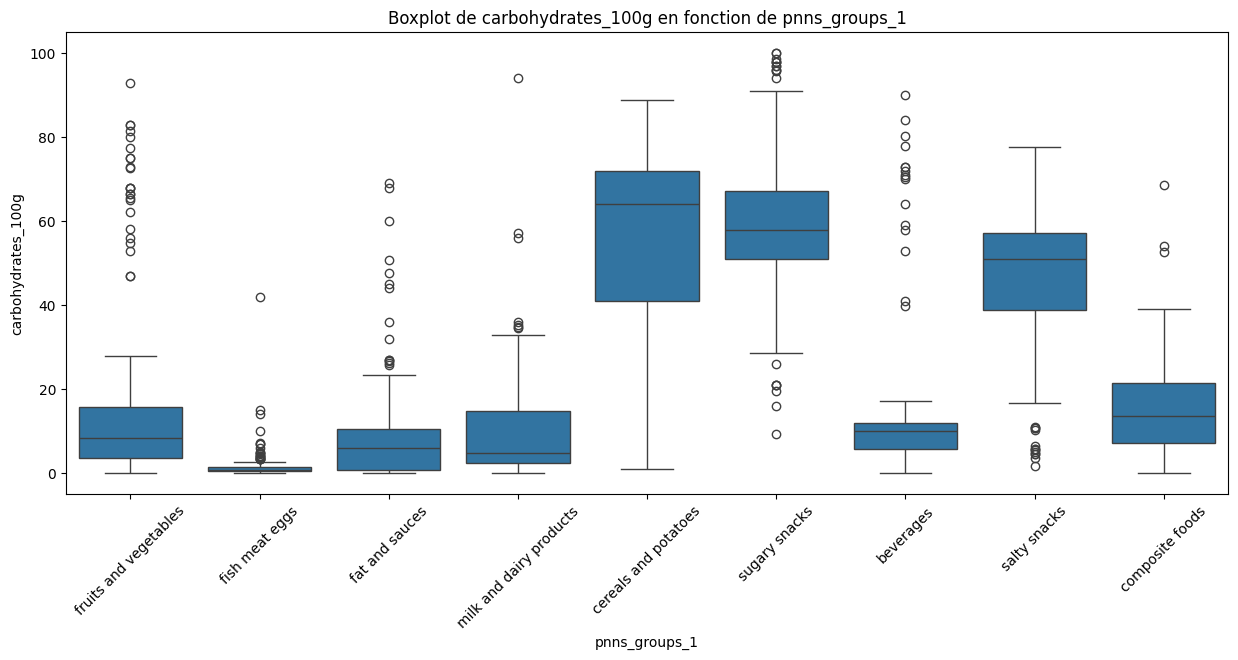

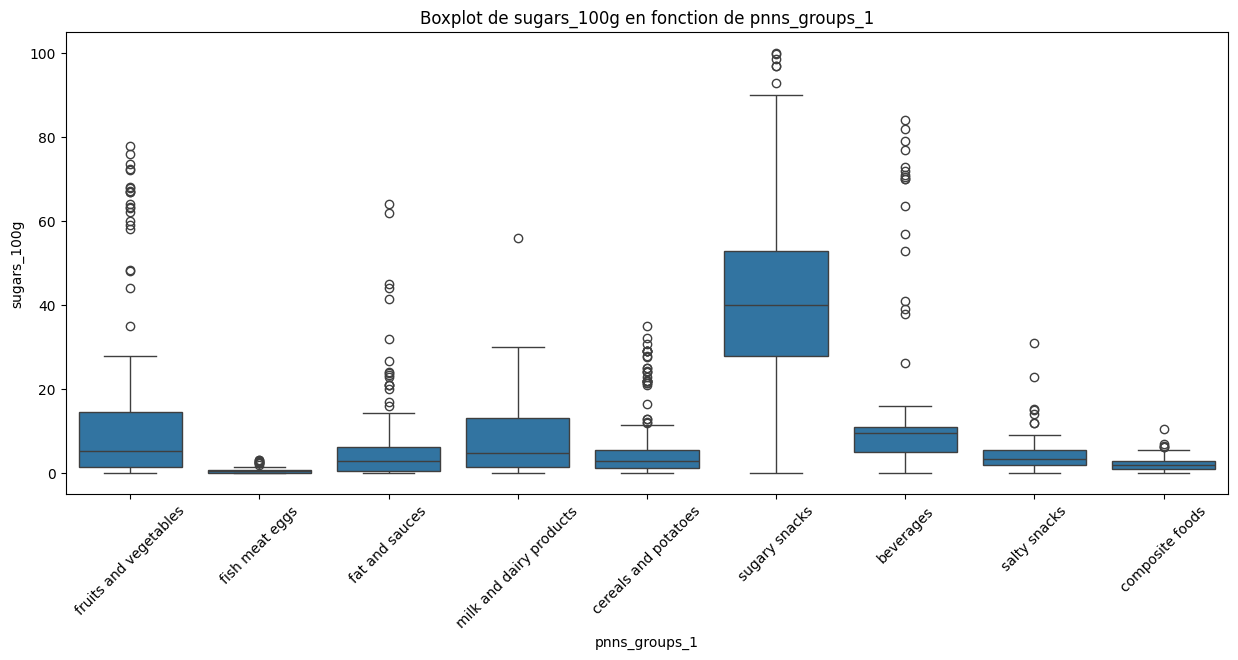

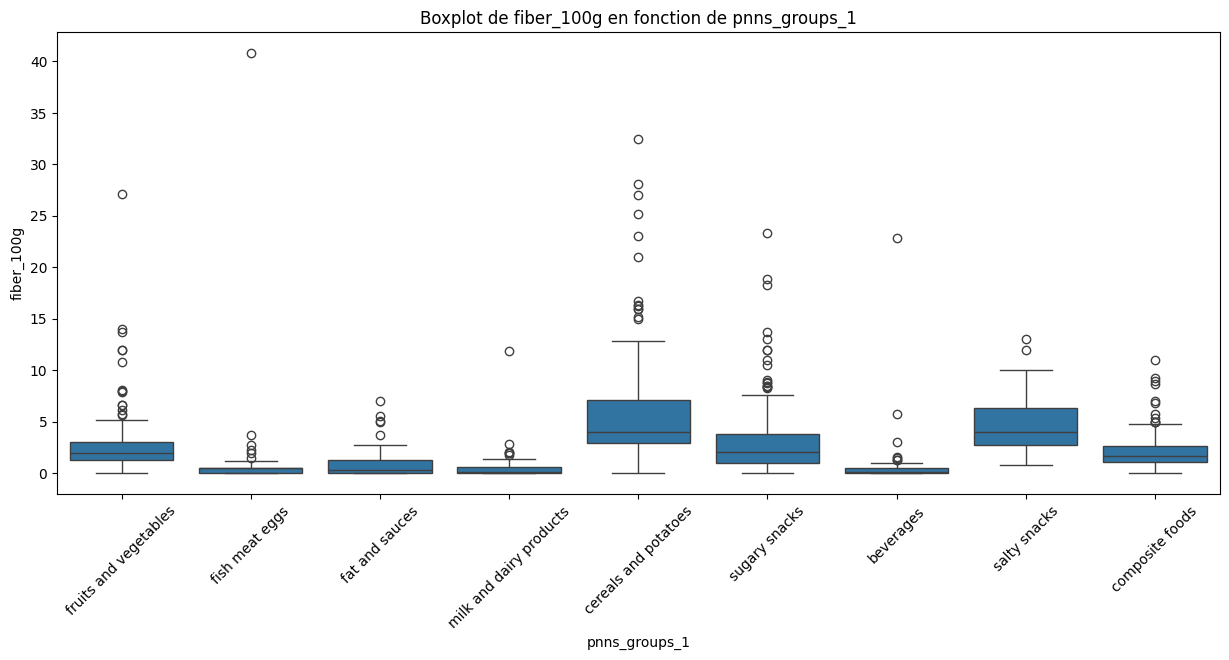

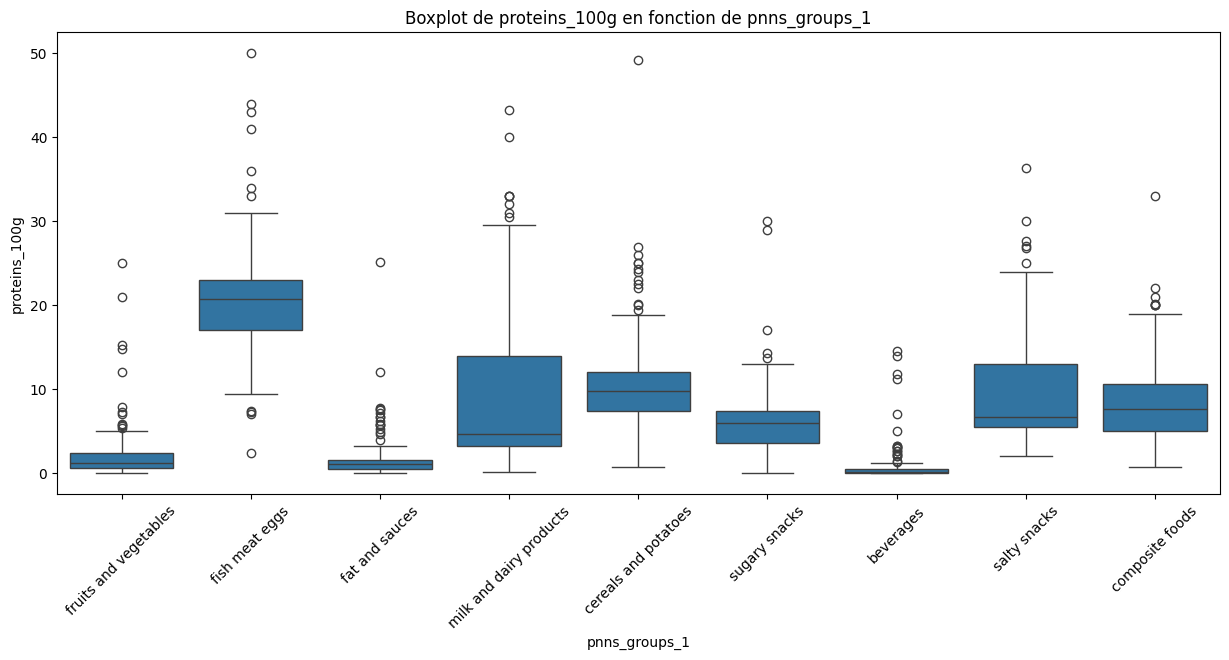

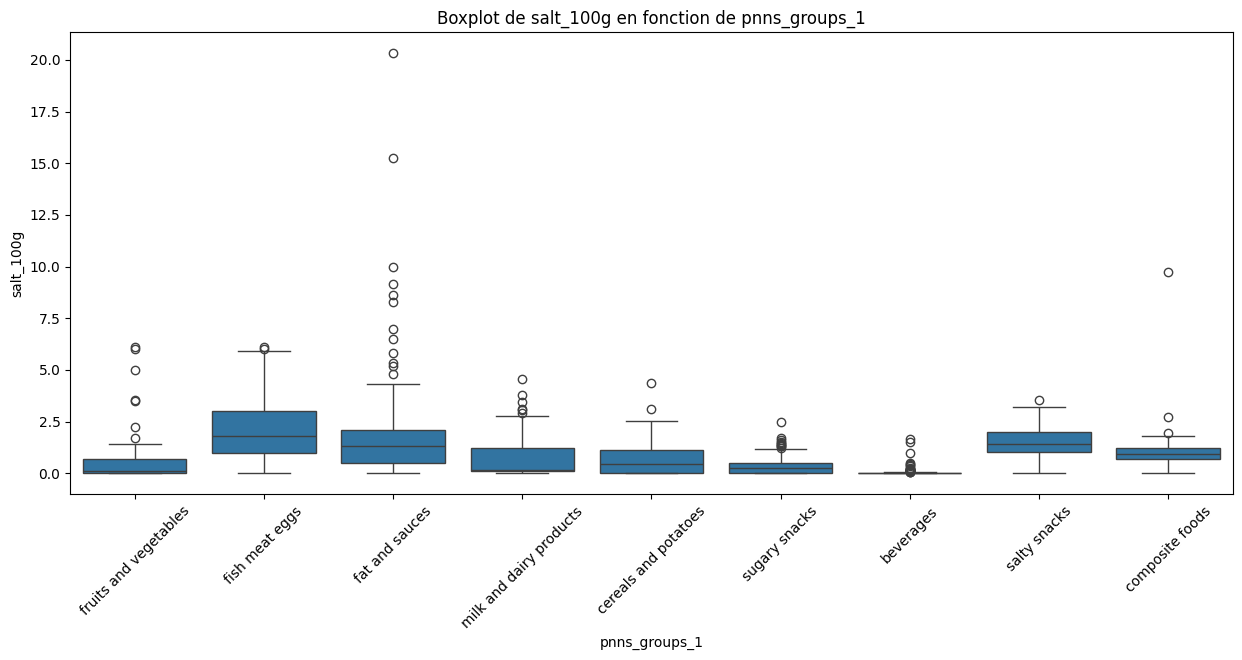

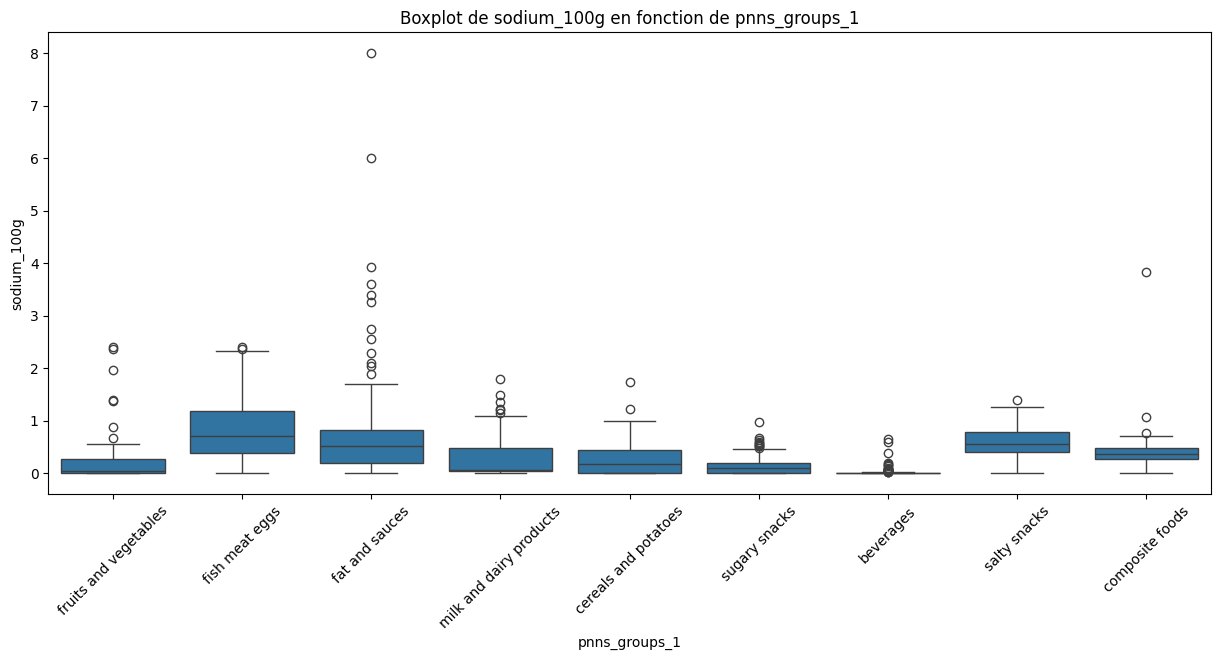

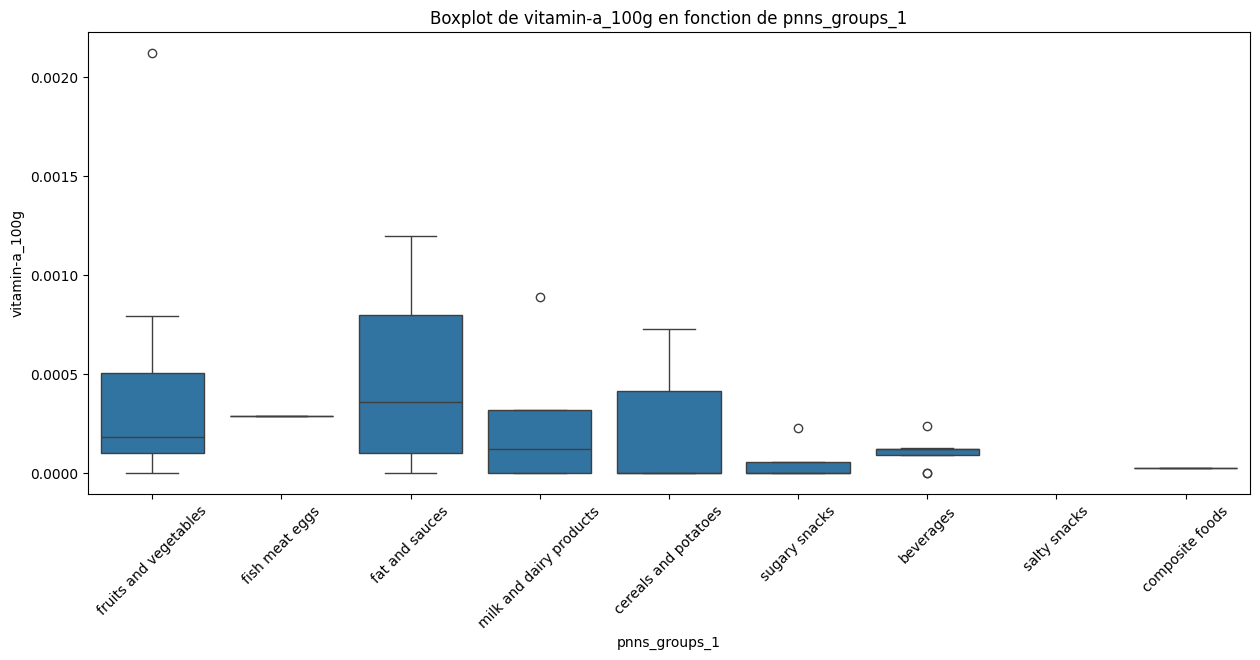

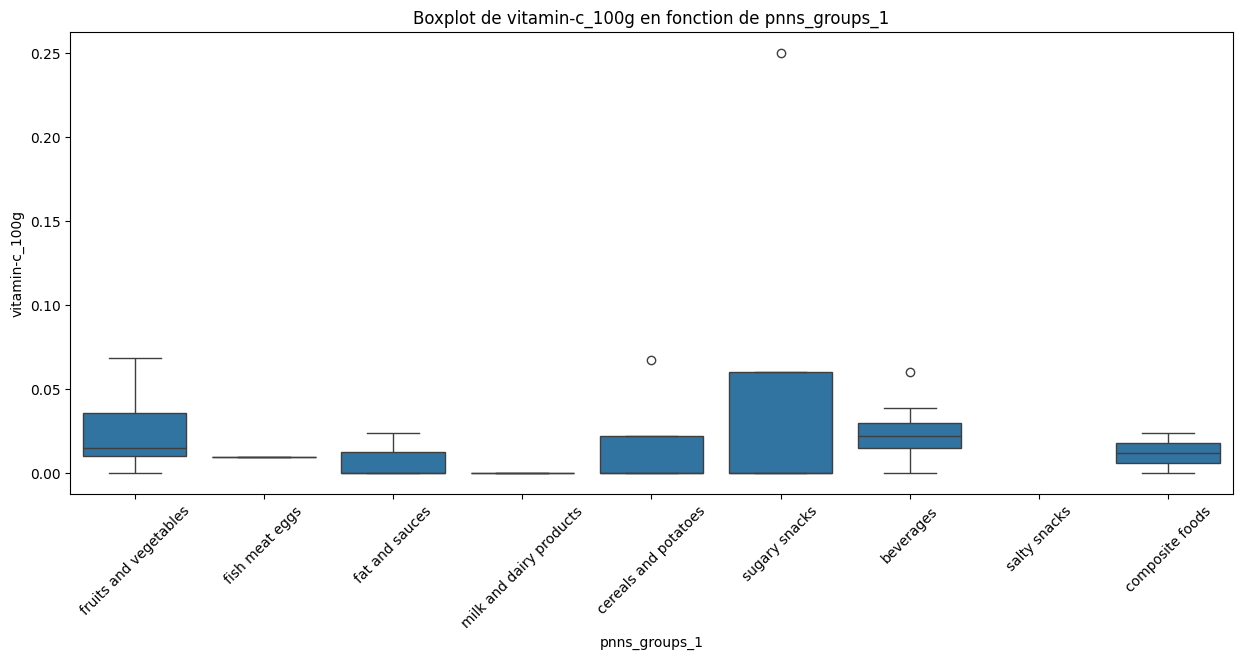

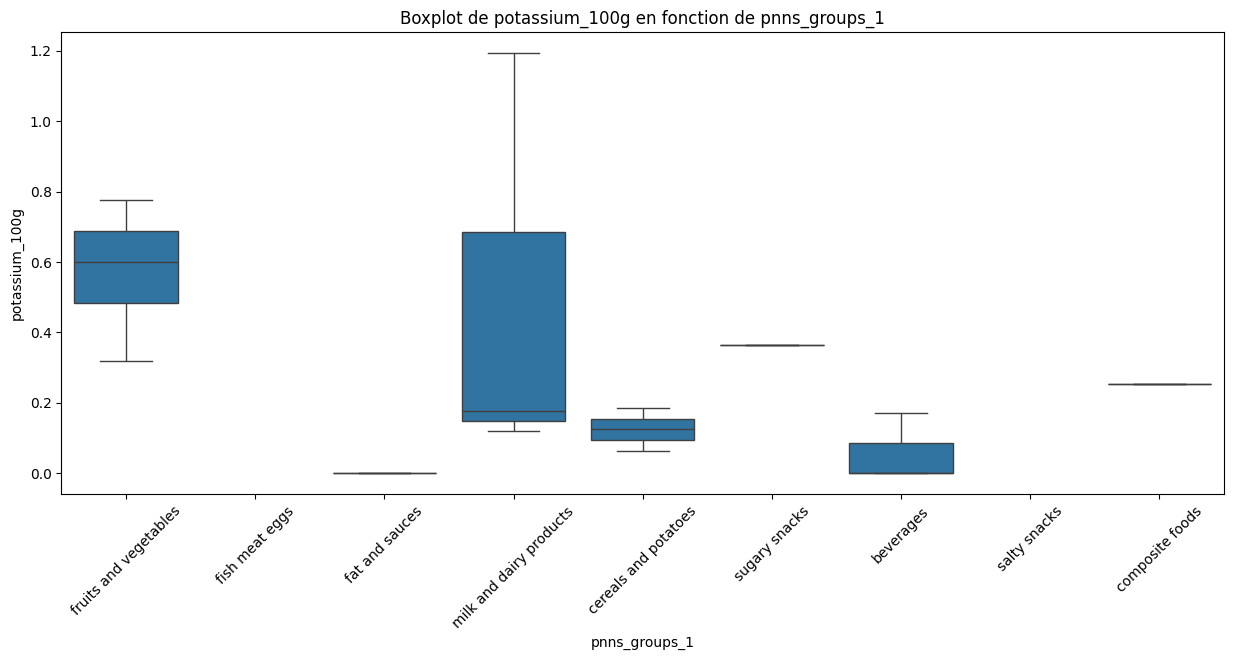

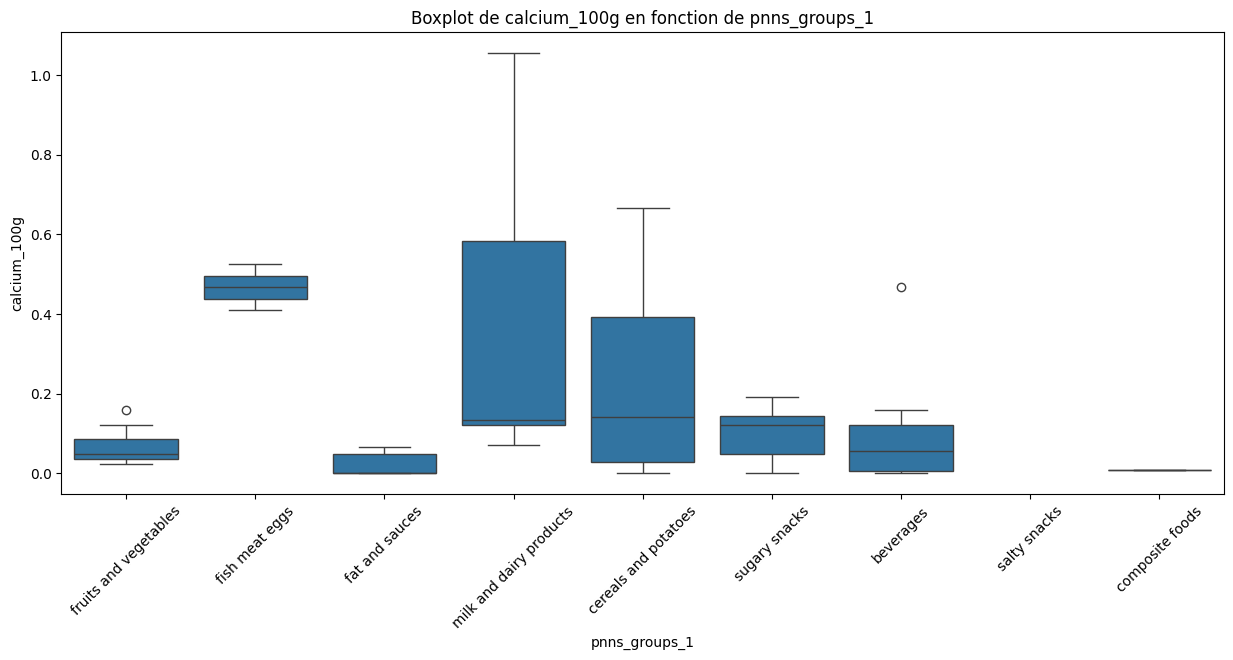

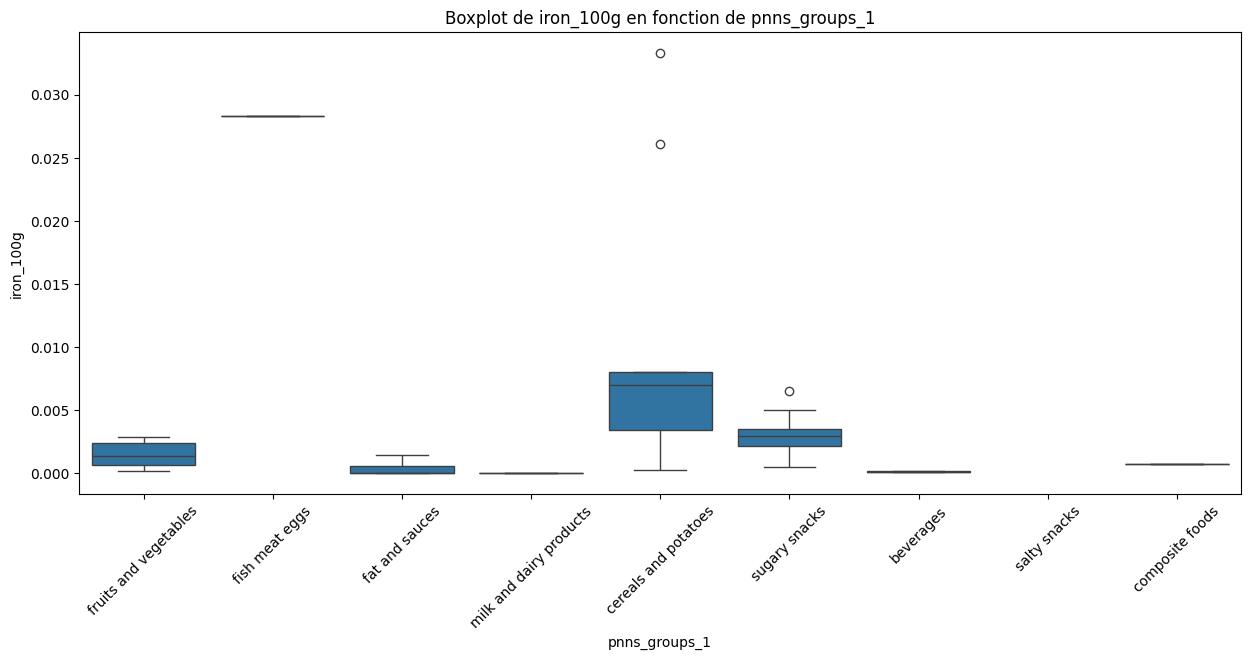

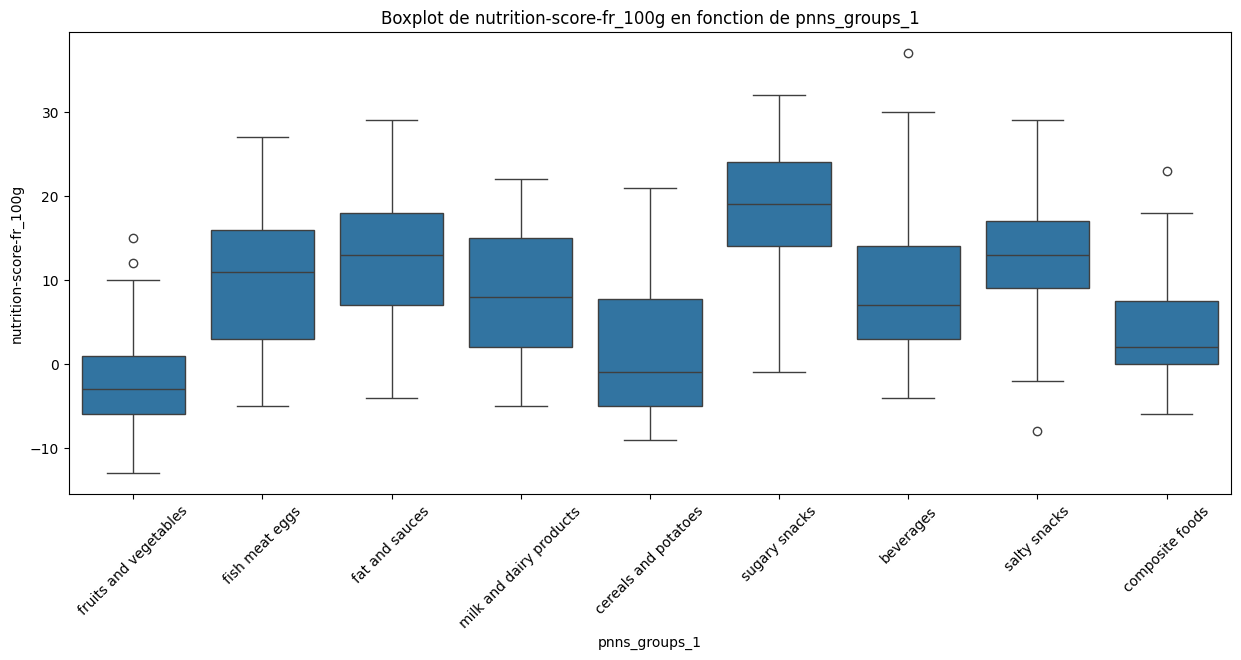

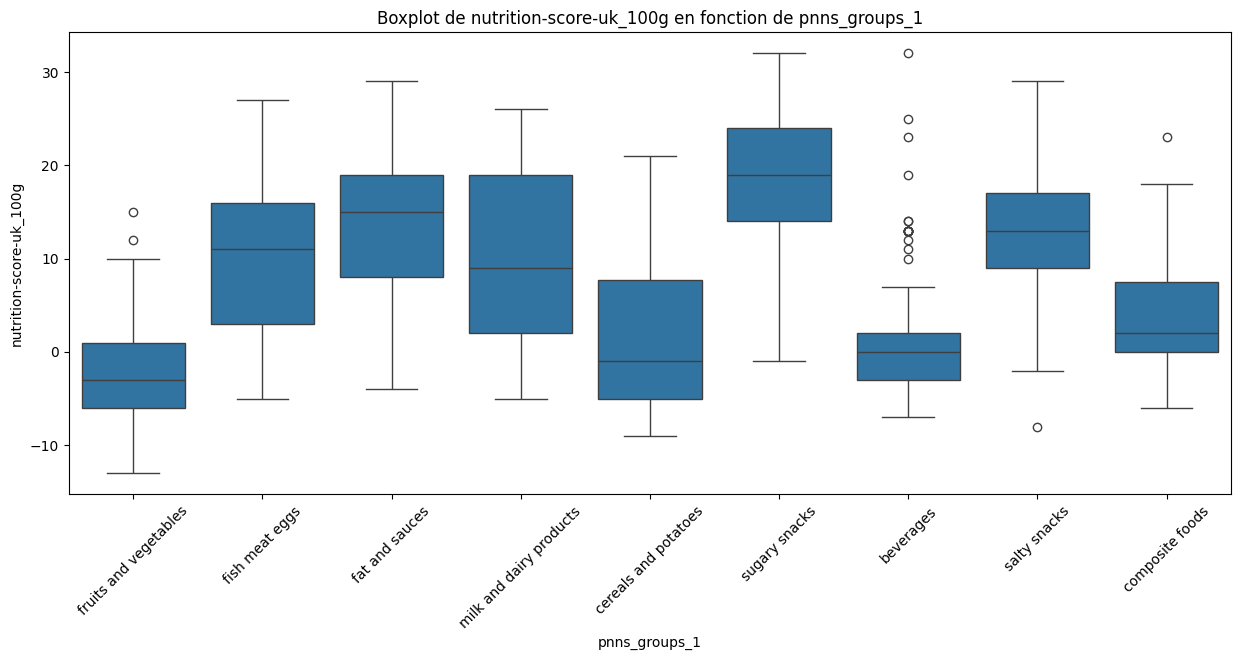

In [71]:
columns_100g = [col for col in df_cleaned.columns if col.endswith('_100g')]
for col in columns_100g:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='pnns_groups_1', y=col, data=df_cleaned)
    plt.title(f'Boxplot de {col} en fonction de pnns_groups_1')
    plt.xlabel('pnns_groups_1')
    plt.xticks(rotation=45)
    plt.ylabel(col)
    plt.show()


# nettoyage de la colonne ingredients_text


In [72]:
# Fonction pour supprimer le texte entre parenthèses
def remove_parentheses(text):
    if isinstance(text, str):
        return re.sub(r'\([^)]*\)', '', text)  # Supprimer le texte entre parenthèses, y compris les espaces
    else:
        return text  # Retourner la valeur d'origine si ce n'est pas une chaîne de caractères




# Appliquer la fonction à la colonne ingredients_text
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].apply(remove_parentheses)
df_cleaned['ingredients_text']=df_cleaned['ingredients_text'].str.lower()
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].str.replace('.', '', regex=False)
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].str.replace('_', ' ', regex=False)
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].str.strip()
df_cleaned_all = df_cleaned.dropna(subset=['ingredients_text'])


In [73]:
non_alphabetic_pattern = re.compile(r'[^\w\s]')

In [74]:
df_cleaned = df_cleaned[df_cleaned['ingredients_text'].apply(lambda x: isinstance(x, str))]
df_cleaned['has_non_alphabetic_ingredients'] = df_cleaned['ingredients_text'].apply(lambda text: non_alphabetic_pattern.search(text) is not None)
len(df_cleaned)

7748

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
df_cleaned_test = df_cleaned

In [76]:
# Séparer les lignes avec et sans valeurs manquantes dans pnns_groups_1
df_missing = df_cleaned[df_cleaned['pnns_groups_1'].isna()]
df_not_missing = df_cleaned[~df_cleaned['pnns_groups_1'].isna()]

In [77]:
# Toutes les classes possibles 
possible_classes = df_cleaned['pnns_groups_1'].unique()

In [78]:

# Encodage des labels textuels en valeurs numériques
label_encoder = LabelEncoder()
label_encoder.fit(possible_classes)


LabelEncoder()

In [79]:

# Conversion des labels du DataFrame non manquant en utilisant l'encodeur ajusté
df_not_missing['pnns_groups_1_encoded'] = label_encoder.transform(df_not_missing['pnns_groups_1'])

In [80]:
# Vectorisation des ingrédients
vectorizer = TfidfVectorizer()
X_not_missing = vectorizer.fit_transform(df_not_missing['ingredients_text'])
y_not_missing = df_not_missing['pnns_groups_1_encoded']


In [81]:
# Division des données non manquantes pour train et test
X_train, X_test, y_train, y_test = train_test_split(X_not_missing, y_not_missing, test_size=0.3, random_state=42)


In [82]:
# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)


In [83]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
# Prédiction 
y_pred_encoded = knn.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_test_original = label_encoder.inverse_transform(y_test)

In [85]:

# Évaluation
print("Accuracy:", accuracy_score(y_test_original, y_pred))
print(classification_report(y_test_original, y_pred, zero_division=0))

Accuracy: 0.6635160680529301
                         precision    recall  f1-score   support

              beverages       0.64      0.81      0.72        67
   cereals and potatoes       0.66      0.64      0.65        73
        composite foods       0.41      0.46      0.43        54
         fat and sauces       0.41      0.54      0.47        35
         fish meat eggs       0.88      0.75      0.81        67
  fruits and vegetables       0.68      0.39      0.49        54
milk and dairy products       0.84      0.75      0.79        61
           salty snacks       0.67      0.56      0.61        25
          sugary snacks       0.73      0.81      0.77        93

               accuracy                           0.66       529
              macro avg       0.66      0.63      0.64       529
           weighted avg       0.68      0.66      0.66       529



In [86]:
pd_echantillon = pd.DataFrame([y_test_original, y_pred]).T
pd_echantillon.columns=['original','prediction']
pd_echantillon

original               prediction
0              sugary snacks            sugary snacks
1    milk and dairy products                beverages
2             fat and sauces    fruits and vegetables
3              sugary snacks  milk and dairy products
4               salty snacks           fat and sauces
..                       ...                      ...
524           fat and sauces          composite foods
525            sugary snacks            sugary snacks
526           fish meat eggs          composite foods
527             salty snacks             salty snacks
528     cereals and potatoes            sugary snacks

[529 rows x 2 columns]

In [87]:
y_test_original

array(['sugary snacks', 'milk and dairy products', 'fat and sauces',
       'sugary snacks', 'salty snacks', 'sugary snacks',
       'cereals and potatoes', 'cereals and potatoes', 'beverages',
       'sugary snacks', 'beverages', 'fish meat eggs', 'fish meat eggs',
       'fruits and vegetables', 'fruits and vegetables', 'sugary snacks',
       'sugary snacks', 'milk and dairy products', 'salty snacks',
       'cereals and potatoes', 'beverages', 'cereals and potatoes',
       'fat and sauces', 'fruits and vegetables',
       'milk and dairy products', 'cereals and potatoes',
       'fruits and vegetables', 'sugary snacks', 'fruits and vegetables',
       'fish meat eggs', 'beverages', 'beverages',
       'milk and dairy products', 'milk and dairy products',
       'fruits and vegetables', 'milk and dairy products', 'beverages',
       'cereals and potatoes', 'milk and dairy products', 'beverages',
       'fruits and vegetables', 'sugary snacks',
       'milk and dairy products', 'fis

In [140]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pnns_group_names = label_encoder.inverse_transform(y_not_missing.unique())

pnns_group_names

array(['fruits and vegetables', 'fish meat eggs', 'fat and sauces',
       'milk and dairy products', 'cereals and potatoes', 'sugary snacks',
       'beverages', 'salty snacks', 'composite foods'], dtype=object)

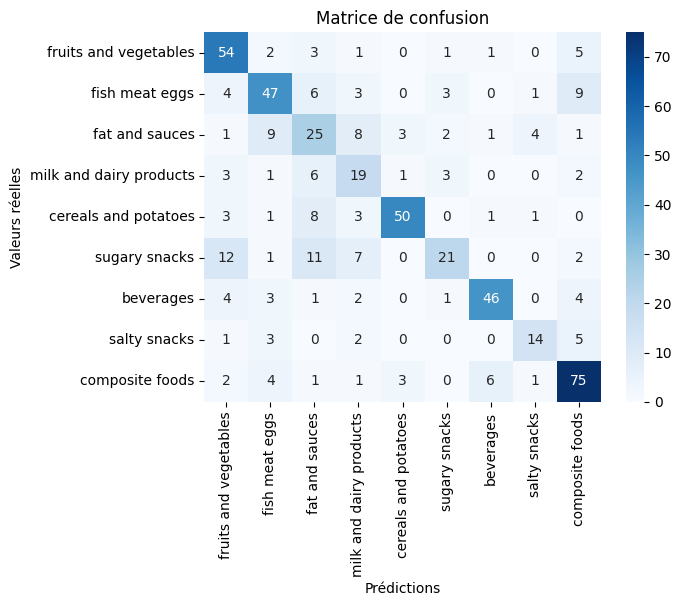

In [141]:
cm = confusion_matrix(y_test_original, y_pred)
cm.shape
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pnns_group_names, yticklabels=pnns_group_names)
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion')
plt.show()

In [89]:

# Conversion des labels du DataFrame non manquant en utilisant l'encodeur ajusté
df_missing['pnns_groups_1_encoded'] = label_encoder.transform(df_missing['pnns_groups_1'])

X_missing = vectorizer.transform(df_missing['ingredients_text'])

In [90]:
# Prédiction des valeurs manquantes
missing_pred_encoded = knn.predict(X_missing)

In [91]:
# Conversion des labels du DataFrame non manquant en utilisant l'encodeur ajusté
missing_pred = label_encoder.inverse_transform(missing_pred_encoded)
missing_pred.shape[0]

5987

<Axes: >

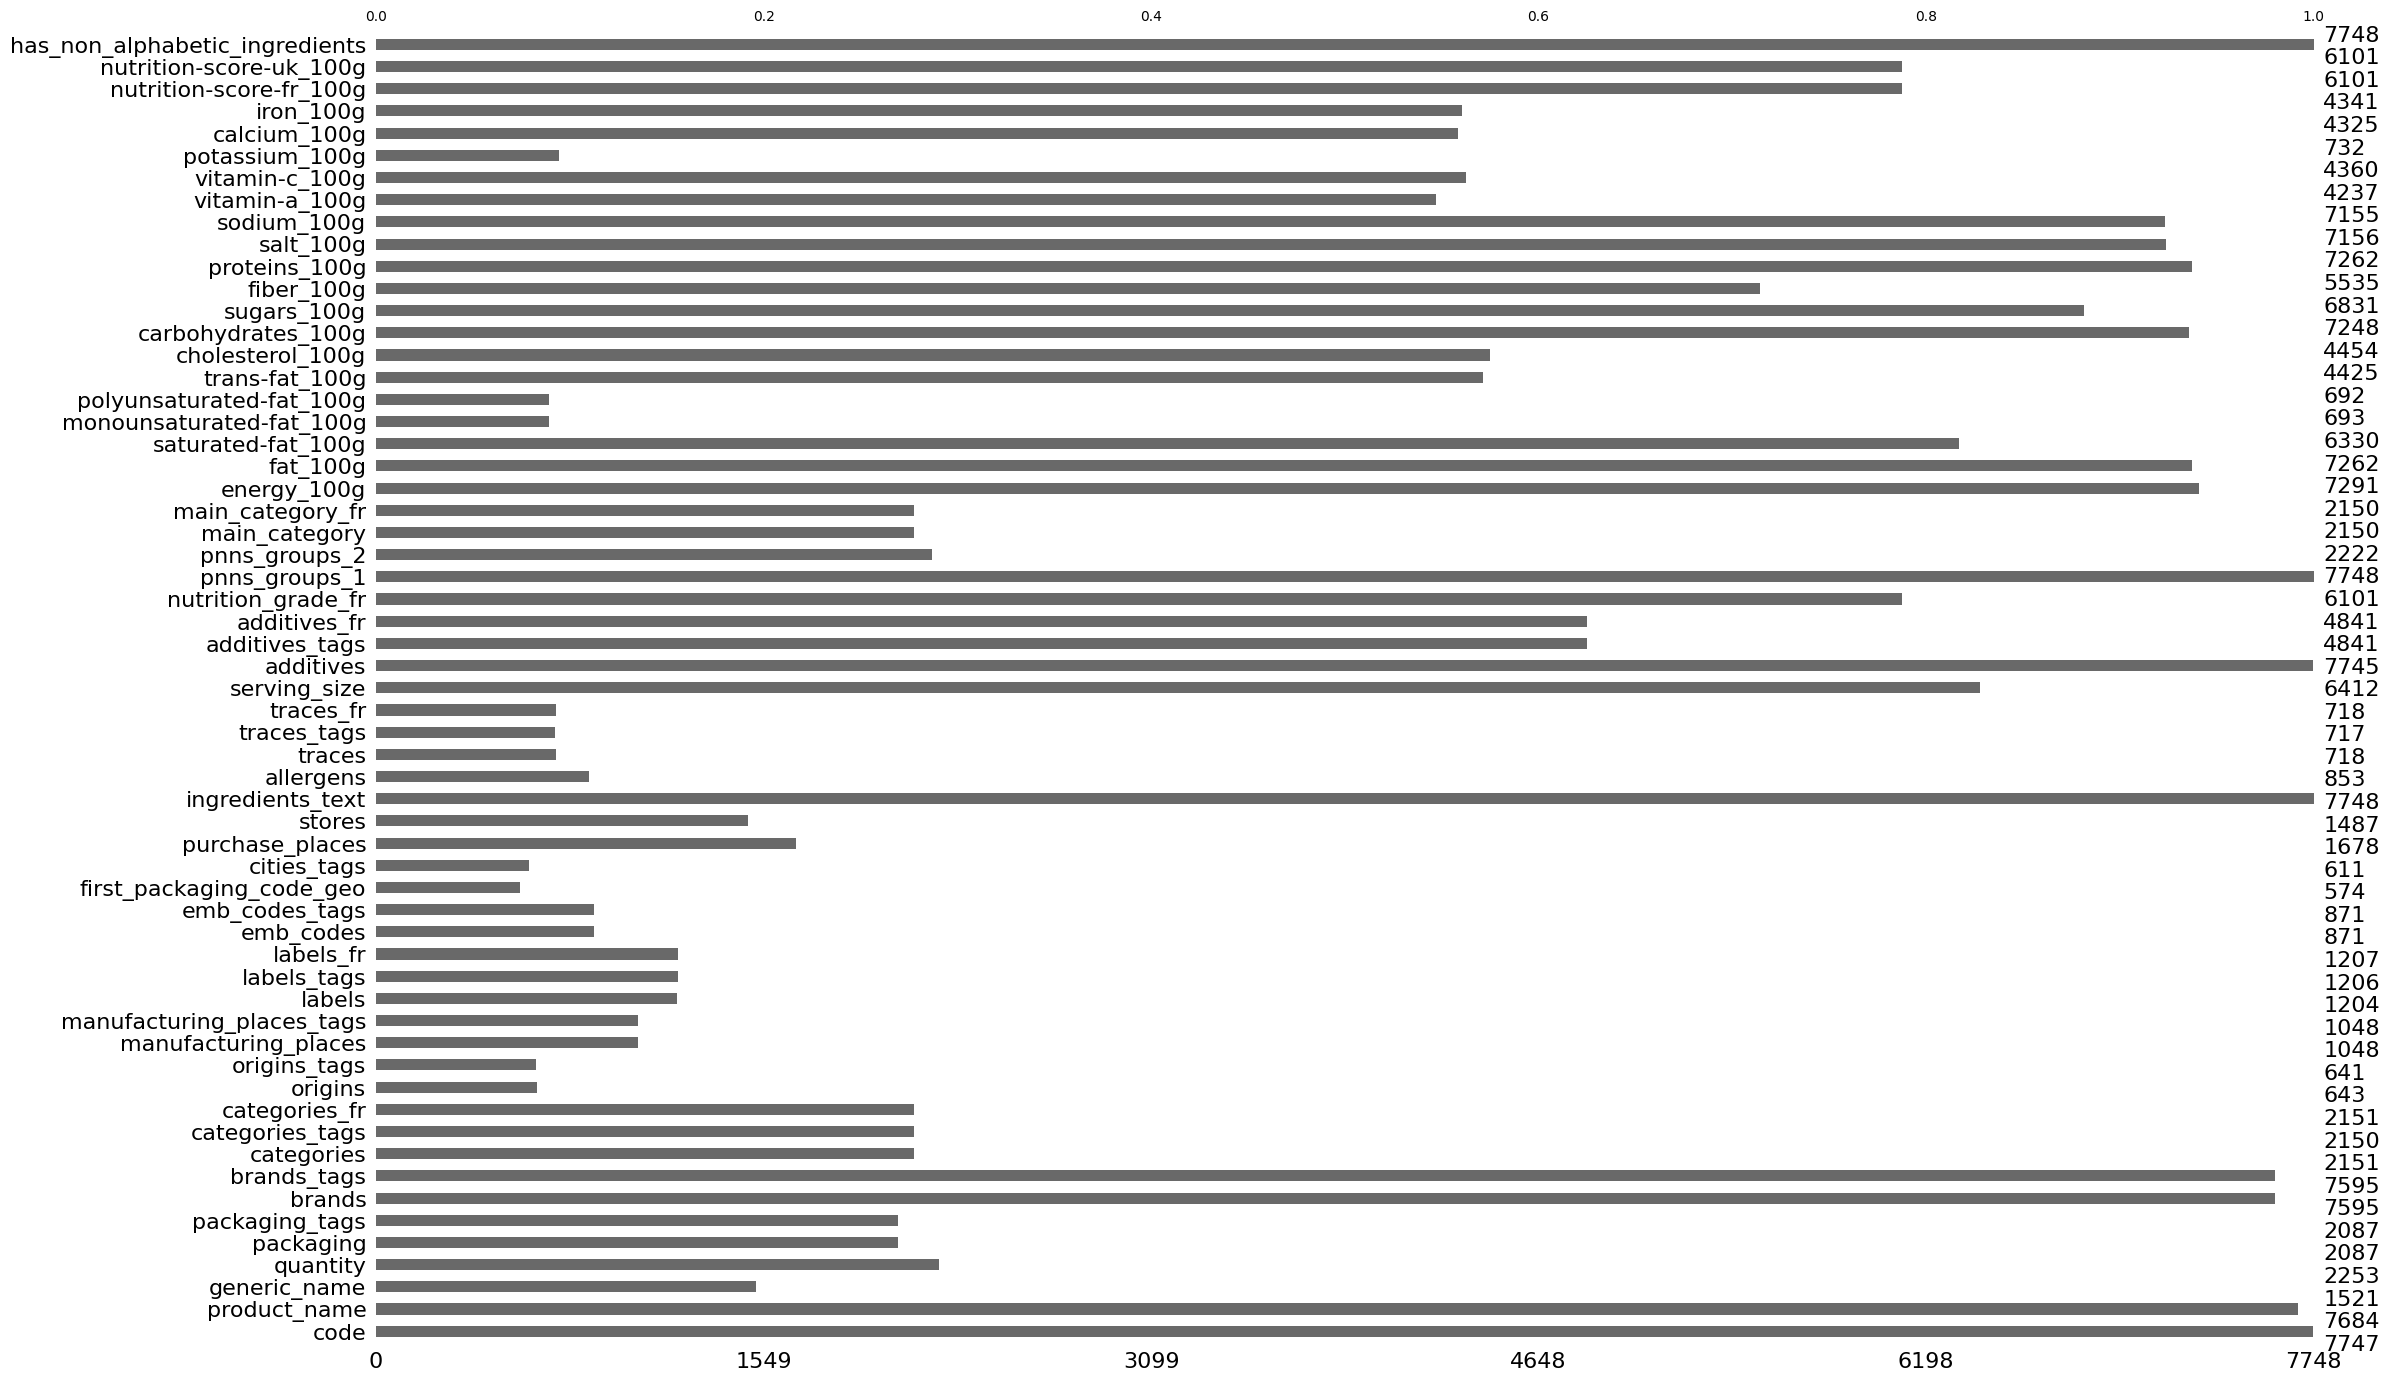

In [92]:
# Ajout des prédictions au DataFrame d'origine
df_cleaned.loc[df_missing.index, 'pnns_groups_1'] = missing_pred
msno.bar(df_cleaned)

In [93]:
df_pnns2 = df_cleaned['pnns_groups_1']
counts = df_pnns2.value_counts()
percentages_after = df_cleaned['pnns_groups_1'].value_counts(normalize=True) * 100
# Créer un DataFrame combiné pour la comparaison
percentages_comparison = pd.DataFrame({
    'Classe': percentages_before.index,
    'Pourcentage_Avant': percentages_before.values,
    'Pourcentage_Apres': percentages_after[percentages_before.index].values
})
fig = px.bar(percentages_comparison, x='Classe', y=['Pourcentage_Avant', 'Pourcentage_Apres'],
             barmode='group',
             labels={'value': 'Pourcentage (%)', 'variable': 'Condition'},
             title='Comparaison des pourcentages avant et après prédiction')

# Afficher le graphique
fig.show()

In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Filtrer uniquement les colonnes qui se terminent par '_100g'
df_100g = df_cleaned.filter(like='_100g')

# Calculer les quantiles et l'IQR pour ces colonnes
Q1 = df_100g.quantile(0.25)
Q3 = df_100g.quantile(0.75)
IQR = Q3 - Q1

# Filtrer les outliers
df_outliers = df_100g[~((df_100g < (Q1 - 1.5 * IQR)) | (df_100g > (Q3 + 1.5 * IQR))).any(axis=1)]

df_outliers.shape

(4516, 20)

In [114]:
# Sélection des colonnes numériques
df_numeric = df_outliers.select_dtypes(include=['float64'])

# Remplacement des NaN par la moyenne de la colonne
df_numeric2 = df_numeric.fillna(df_numeric2.mean())

# Standardisation des données
scaler2 = StandardScaler()
df_scaled2 = scaler2.fit_transform(df_numeric2)
# Création de l'objet PCA 2
pca2 = PCA()
df_numeric2

energy_100g   fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
73969   1536.000000   3.330000            0.000000                  3.855417   
185029    73.000000   0.100000            0.000000                  3.855417   
29484    163.000000   0.000000            0.000000                  3.855417   
147698  1469.000000   1.750000            0.000000                  3.855417   
171767  1795.000000  17.860000            3.570000                  3.570000   
...             ...        ...                 ...                       ...   
184803   942.362122   8.532519            3.255344                  3.855417   
112261     0.000000   0.000000            3.255344                  3.855417   
233276   942.362122   8.532519            3.255344                  3.855417   
163315  2092.000000  32.140000           16.070000                  3.855417   
284343   942.362122   8.532519            3.255344                  3.855417   

        polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  \
73969                   2.515565             0.0          0.000000   
185029                  2.515565             0.0          0.006743   
29484                   2.515565             0.0          0.000000   
147698                  2.515565             0.0          0.000000   
171767                  7.140000             0.0          0.000000   
...                          ...             ...               ...   
184803                  2.515565             0.0          0.006743   
112261                  2.515565             0.0          0.006743   
233276                  2.515565             0.0          0.006743   
163315                  2.515565             0.0          0.036000   
284343                  2.515565             0.0          0.006743   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
73969            70.000000     3.330000    3.300000       13.33000    1.94818   
185029            1.600000     1.100000    2.500000        1.30000    0.75000   
29484             9.030000     0.650000    1.300000        1.29000    0.22860   
147698           71.930000     3.510000    3.500000       12.28000    0.00000   
171767           71.430000     0.000000    0.000000        7.14000    2.17678   
...                    ...          ...         ...            ...        ...   
184803           31.684613    13.489197    2.148664        5.58497    0.72086   
112261            0.000000    13.489197    2.148664        0.00000    0.00000   
233276           31.684613    13.489197    2.148664        5.58497    0.72086   
163315           57.140000    50.000000    3.600000        3.57000    0.54356   
284343           31.684613    13.489197    2.148664        5.58497    0.72086   

        sodium_100g  vitamin-a_100g  vitamin-c_100g  potassium_100g  \
73969      0.767000        0.000000        0.004000        0.177162   
185029     0.295276        0.000033        0.001039        0.177162   
29484      0.090000        0.000000        0.000000        0.155000   
147698     0.000000        0.000000        0.000000        0.177162   
171767     0.857000        0.000000        0.000000        0.177162   
...             ...             ...             ...             ...   
184803     0.283876        0.000033        0.001039        0.177162   
112261     0.000000        0.000033        0.001039        0.177162   
233276     0.283876        0.000033        0.001039        0.177162   
163315     0.214000        0.000107        0.000000        0.177162   
284343     0.283876        0.000033        0.001039        0.177162   

        calcium_100g  iron_100g  nutrition-score-fr_100g  \
73969       0.000000   0.000000                 8.000000   
185029      0.047084   0.001266                -5.000000   
29484       0.097000   0.000230                -1.000000   
147698      0.035000   0.001890                -5.000000   
171767      0.000000   0.000000                17.000000   
...              ...

In [96]:
# Ajustement de l'ACP sur les données standardisées
pca2.fit(df_scaled2)

# Création d'un DataFrame avec les composantes principales
df_pca_components2 = pd.DataFrame(pca2.components_, columns=df_numeric2.columns)


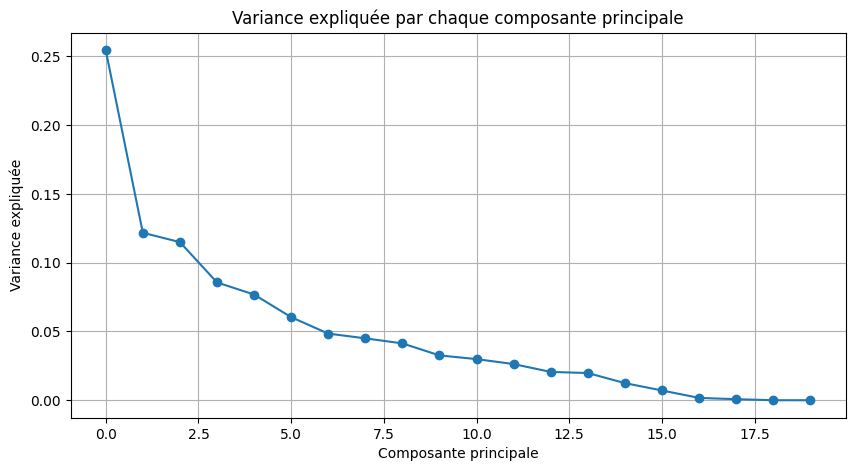

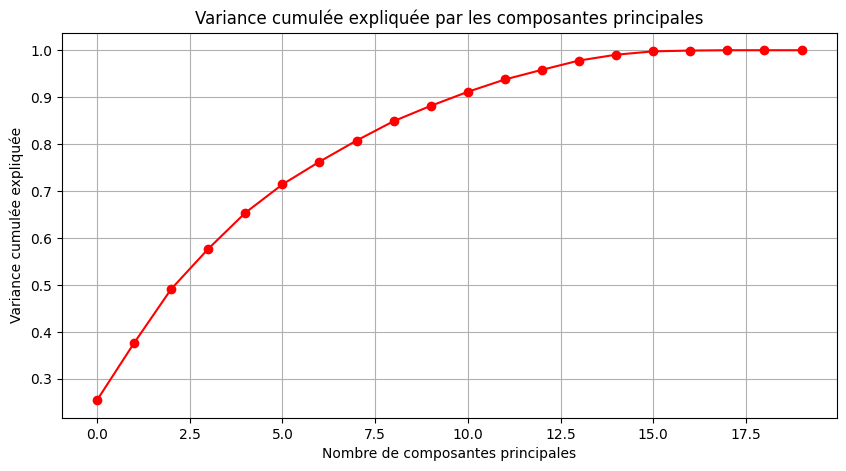

In [97]:
# Affichage
plt.figure(figsize=(10, 5))
plt.plot(pca2.explained_variance_ratio_, marker='o')
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.grid(True)
plt.show()

# Affichage de la variance cumulée expliquée par les composantes principales
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca2.explained_variance_ratio_), marker='o', color='red')
plt.title('Variance cumulée expliquée par les composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.grid(True)
plt.show()

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.518700  2.260160  0.562447 -0.690310 -2.050388  1.247079  0.138840   
1 -2.933299  0.744168  0.350474  0.392914 -0.019095 -0.131683 -0.094095   
2 -2.788677 -0.521982  0.145078  0.256135  0.053529 -1.297457 -0.447543   
3 -1.070553 -0.228408  3.460315 -0.063728  0.506966 -0.428061 -0.235151   
4  2.851853  2.012229 -0.643218  1.652745 -3.472556 -1.522908 -0.023599   

        PC8       PC9      PC10  ...      PC12      PC13      PC14      PC15  \
0 -0.191253 -1.737532 -2.310233  ...  0.402921 -0.027499  0.213392  0.936261   
1  0.040420  0.435642  0.493975  ...  0.566929  0.150435 -0.235445 -0.241403   
2 -0.170914  1.478101 -1.016240  ...  0.087874  0.195788 -0.124210  0.129308   
3 -0.772824 -0.937033 -0.531187  ... -0.685574  0.189763 -0.121187  0.516720   
4 -1.289584 -0.514896 -1.206579  ... -1.051516 -2.731109 -2.430077  0.824763   

       PC16      PC17      PC18      PC19          PC20  pnns_groups

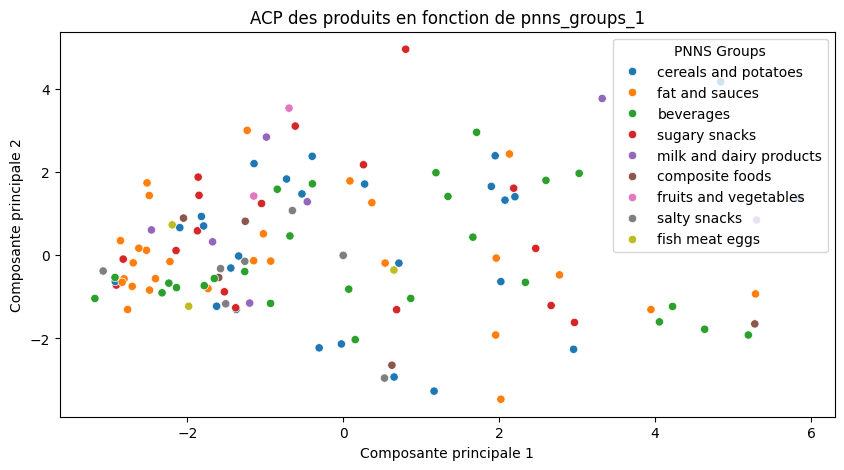

In [98]:
# Résumé des composantes principales
df_pca2 = pd.DataFrame(pca2.transform(df_scaled2), columns=[f'PC{i+1}' for i in range(df_scaled2.shape[1])])
df_pca2['pnns_groups_1'] = df_cleaned['pnns_groups_1']
print(df_pca2.head())

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_pca2, x='PC1', y='PC2', hue='pnns_groups_1', palette='tab10')
plt.title('ACP des produits en fonction de pnns_groups_1')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend(title='PNNS Groups')
plt.show()

In [99]:
# Graphique des corrélations
def correlationgraph(pca2, features):
    plt.figure(figsize=(12, 12))
    for i in range(pca2.components_.shape[1]):
        plt.arrow(0, 0, pca2.components_[0, i], pca2.components_[1, i], 
                  head_width=0.05, head_length=0.05, color='red')
        plt.text(pca2.components_[0, i] + 0.05, pca2.components_[1, i] + 0.05, 
                 features[i], color='red', ha='center', va='center', fontsize=12)

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f'PC1 ({pca2.explained_variance_ratio_[0] * 100:.1f}%)', fontsize=14)
    plt.ylabel(f'PC2 ({pca2.explained_variance_ratio_[1] * 100:.1f}%)', fontsize=14)
    plt.grid()
    plt.axhline(0, color='grey', ls='--')
    plt.axvline(0, color='grey', ls='--')
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', ls='--')
    plt.gca().add_artist(circle)
    plt.title('Cercle des corrélations', fontsize=16)
    plt.show()


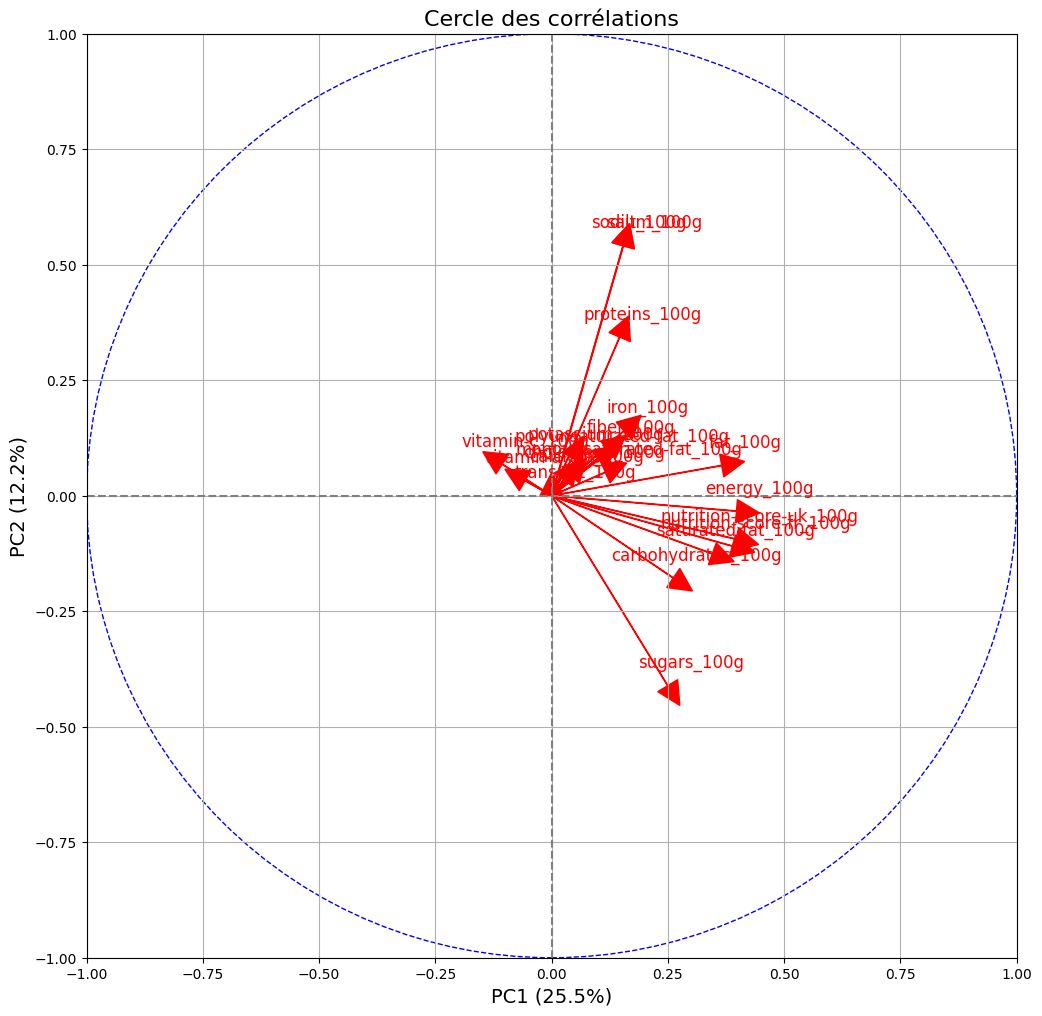

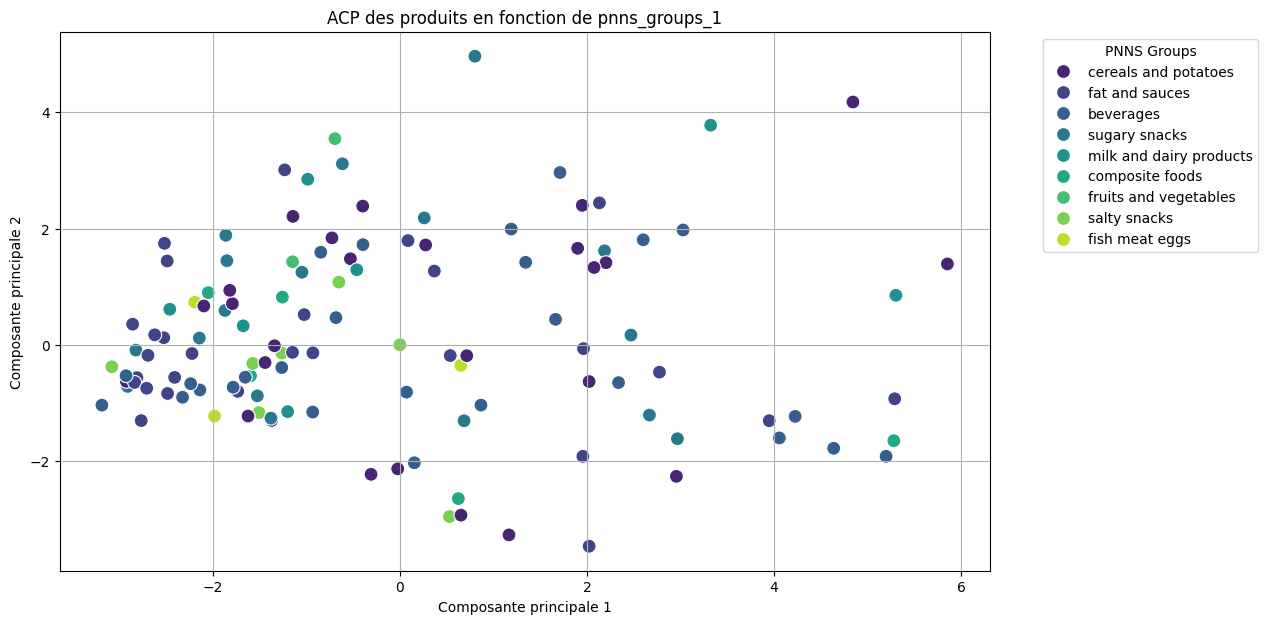

In [100]:
# Appel de la fonction avec les colonnes numériques de votre DataFrame
correlationgraph(pca2, df_numeric2.columns)
# Nuage de points des deux premières composantes principales
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_pca2, x='PC1', y='PC2', hue='pnns_groups_1', palette='viridis', s=100)
plt.title('ACP des produits en fonction de pnns_groups_1')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend(title='PNNS Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [101]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

In [102]:
columns_with_missing_values = ['sugars_100g','carbohydrates_100g','proteins_100g','nutrition-score-fr_100g']
columns_without_missing_values = ['sugars_100g','carbohydrates_100g','proteins_100g','nutrition-score-fr_100g']

df_test=df_cleaned[columns_without_missing_values]
df_test = df_test.dropna(subset='sugars_100g')
df_test.describe()

sugars_100g  carbohydrates_100g  proteins_100g  nutrition-score-fr_100g
count  6831.000000         6789.000000    6806.000000              6096.000000
mean     16.325584           33.747306       7.222308                 9.255577
std      21.623551           29.310676       8.099601                 9.128324
min      -6.670000            0.000000       0.000000               -13.000000
25%       1.190000            6.670000       0.800000                 1.000000
50%       5.560000           23.440000       4.760000                10.000000
75%      25.000000           60.000000      10.530000                16.000000
max     103.000000          103.000000      71.430000                37.000000

In [103]:

imputer.fit(df_test[columns_with_missing_values])

IterativeImputer(random_state=0)

sugars_100g  carbohydrates_100g  proteins_100g  nutrition-score-fr_100g
count  6831.000000         6831.000000    6831.000000              6831.000000
mean     16.325584           33.775173       7.217276                 9.378154
std      21.623551           29.294787       8.087613                 8.954506
min      -6.670000            0.000000      -1.874693               -13.000000
25%       1.190000            6.770000       0.800000                 2.000000
50%       5.560000           23.530000       4.760000                 9.000000
75%      25.000000           60.000000      10.500000                16.000000
max     103.000000          114.520465      71.430000                38.156501

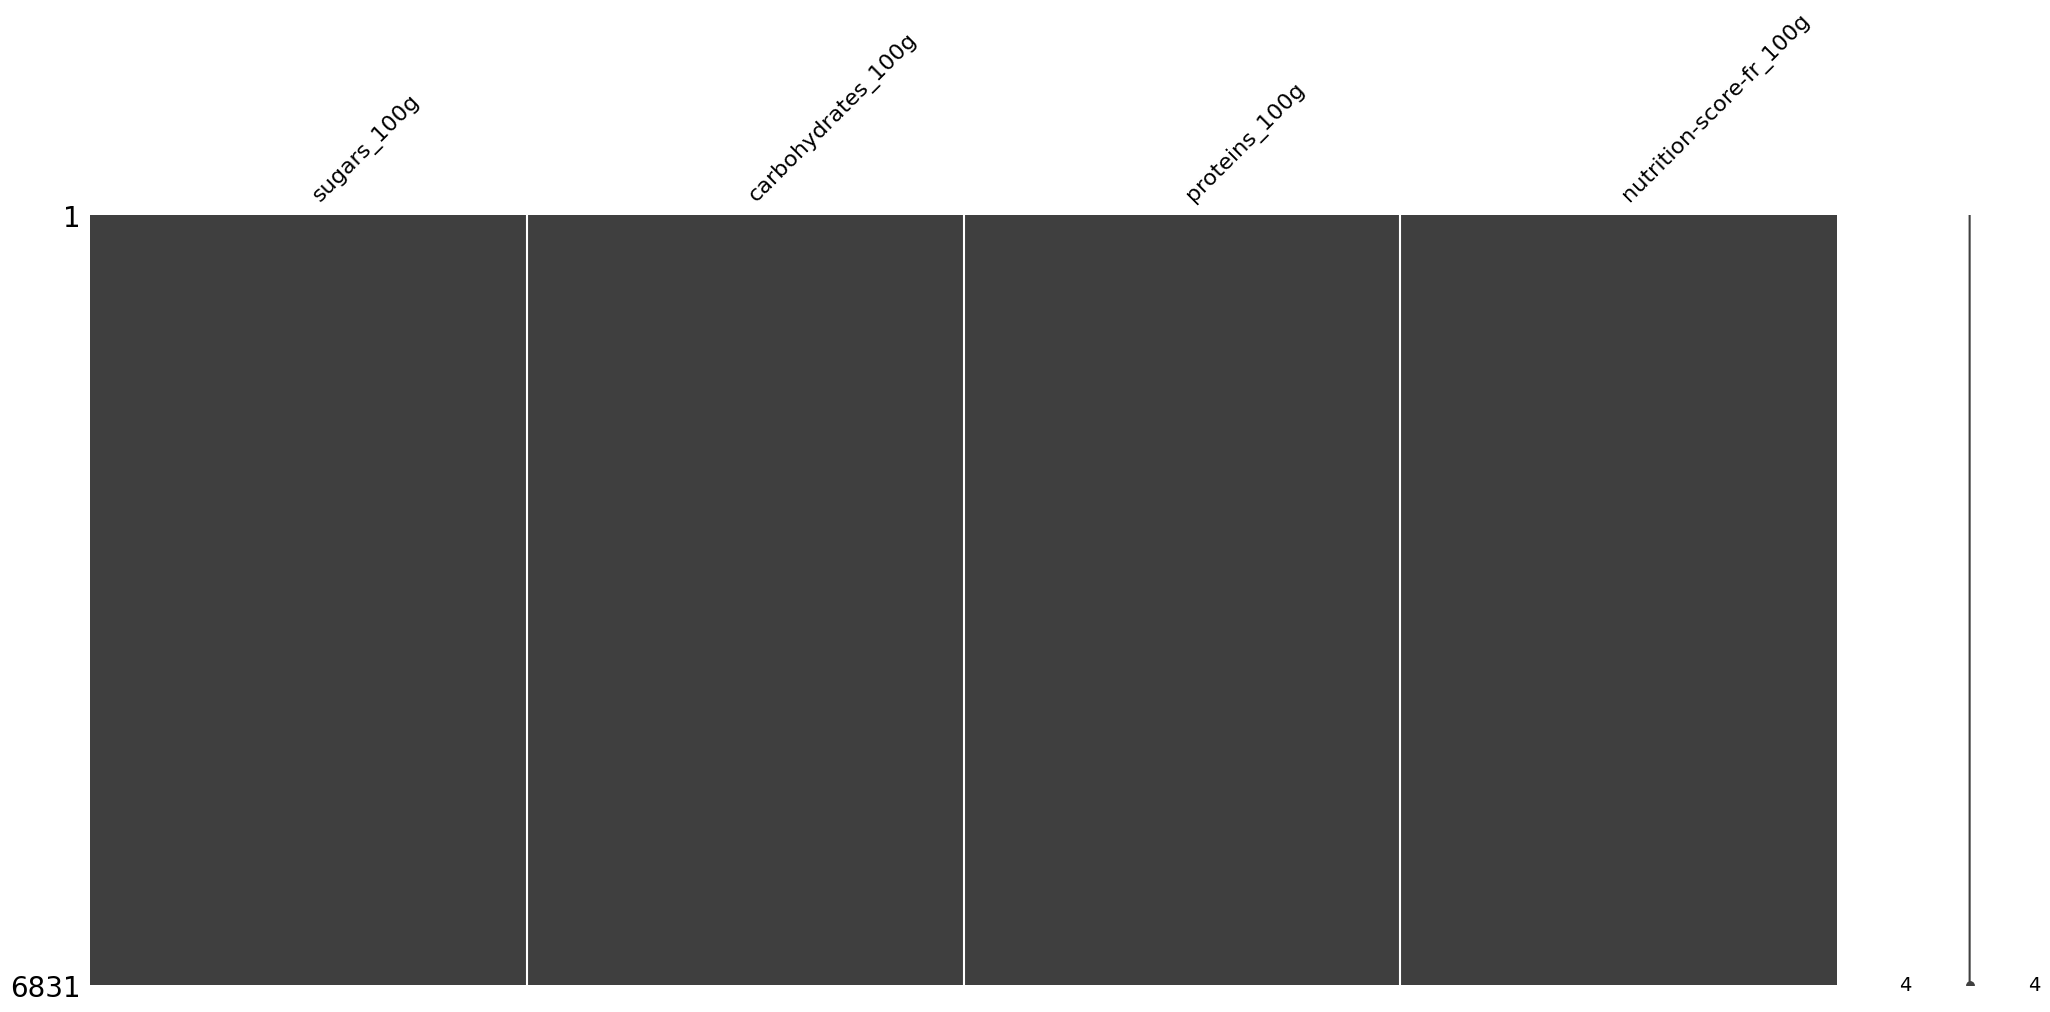

In [104]:
data_imputed = imputer.transform(df_test[columns_with_missing_values])
df_test[columns_with_missing_values] = data_imputed
msno.matrix(df_test)
df_test.describe()

In [118]:
import scipy.stats as st

print("pearson : ",st.pearsonr(df_test["nutrition-score-fr_100g"],df_test["sugars_100g"])[0])
print("covariance : ",np.cov(df_test["nutrition-score-fr_100g"],df_test["sugars_100g"],ddof=0)[1,0])

pearson :  0.5296441076980611
covariance :  102.53903244631087


C:\Users\devil\AppData\Local\Temp\ipykernel_25208\734940384.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



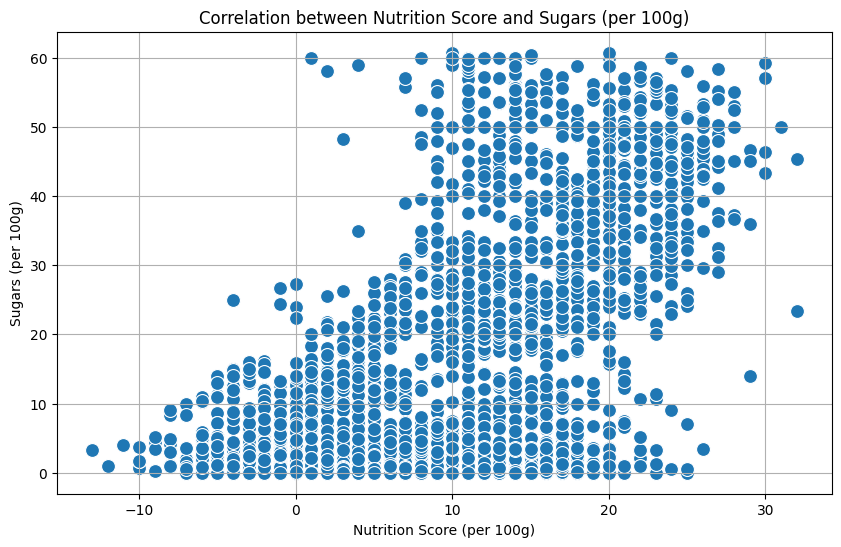

In [116]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numeric, x='nutrition-score-fr_100g', y='sugars_100g',  palette='viridis', s=100)
plt.title('Correlation between Nutrition Score and Sugars (per 100g)')
plt.xlabel('Nutrition Score (per 100g)')
plt.ylabel('Sugars (per 100g)')
plt.grid(True)
plt.show()

C:\Users\devil\AppData\Local\Temp\ipykernel_25208\714180739.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



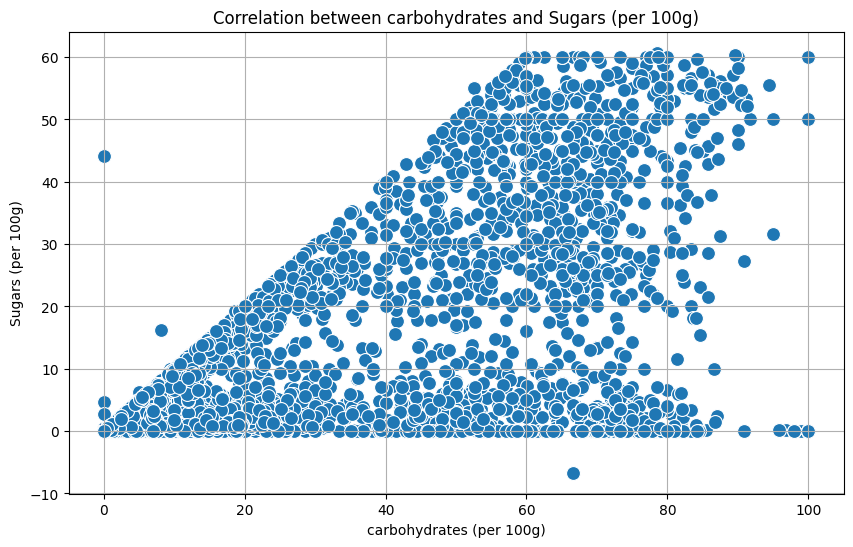

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numeric, x='carbohydrates_100g', y='sugars_100g',  palette='viridis', s=100)
plt.title('Correlation between carbohydrates and Sugars (per 100g)')
plt.xlabel('carbohydrates (per 100g)')
plt.ylabel('Sugars (per 100g)')
plt.grid(True)
plt.show()

In [121]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [128]:
df_numeric['pnns_groups_1'] = df_cleaned['pnns_groups_1']
df_numeric.columns



Index(['energy_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'potassium_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'pnns_groups_1'],
      dtype='object')

In [135]:
df_numeric=df_numeric.rename(columns={'nutrition-score-fr_100g': 'nutritionScoreFr_100g'})
# Fit the model
model = ols('nutritionScoreFr_100g ~ C(pnns_groups_1)', data=df_numeric).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq      df           F         PR(>F)
C(pnns_groups_1)   66910.539710     8.0  144.067325  3.431478e-209
Residual          197909.232087  3409.0         NaN            NaN


C:\Users\devil\AppData\Local\Temp\ipykernel_25208\1425267569.py:8: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



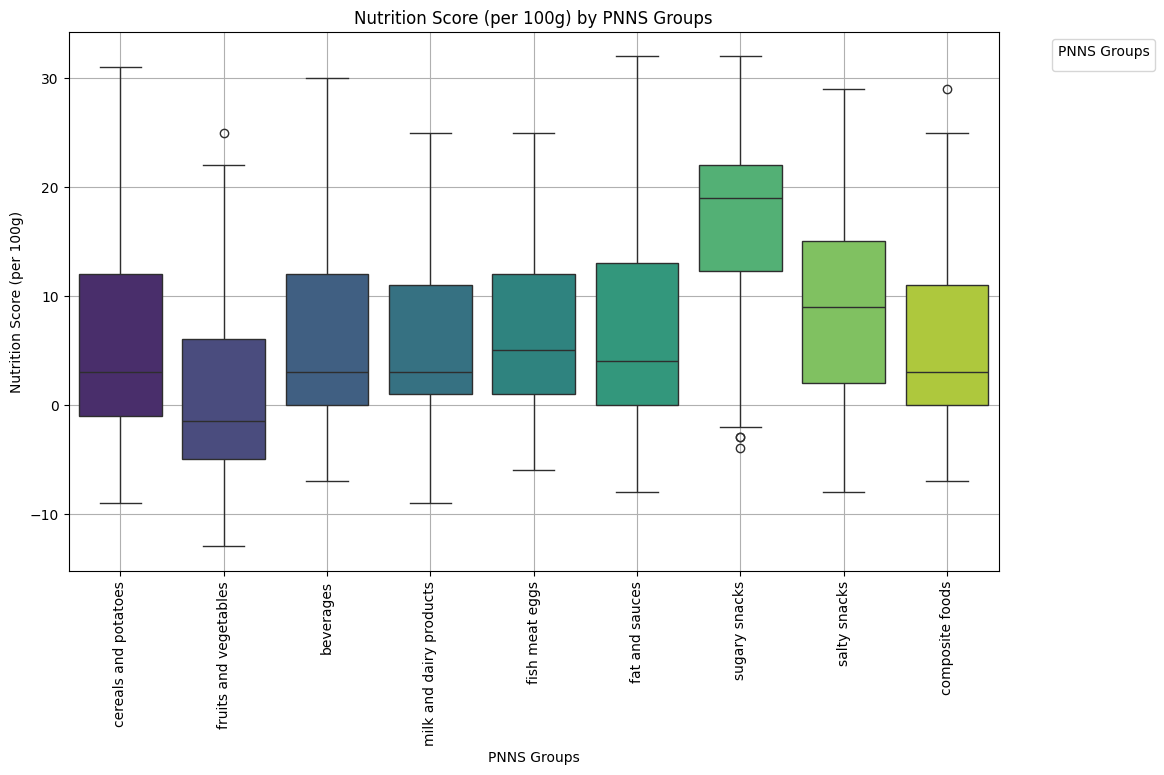

In [137]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pnns_groups_1', y='nutritionScoreFr_100g', data=df_numeric, palette='viridis', hue='pnns_groups_1', dodge=False)
plt.title('Nutrition Score (per 100g) by PNNS Groups')
plt.xlabel('PNNS Groups')
plt.ylabel('Nutrition Score (per 100g)')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='PNNS Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()